in /53_results_clusters/ we can find the python useable h5ad and in /53_results_clusters/decontx_with_clusters_SCEh5 the assays.h5 table

# trim decontX

In [4]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#assays = sc.read_10x_h5("53_results_clusters/decontx_with_clusters_SCEh5/assays.h5")
adata = sc.read_h5ad("53_results_clusters/decontx_with_clusters.h5ad")
foreground = sc.read_h5ad("00_data/foreground.h5ad")

In [6]:
adata.var_names

Index(['ENSSSCG00000028996', 'ENSSSCG00000005267', 'ENSSSCG00000005268',
       'ENSSSCG00000005269', 'ENSSSCG00000031382', 'ENSSSCG00000005271',
       'ENSSSCG00000005272', 'ENSSSCG00000005273', 'ENSSSCG00000045514',
       'ENSSSCG00000023520',
       ...
       'ENSSSCG00000018080', 'ENSSSCG00000018081', 'ENSSSCG00000018082',
       'ENSSSCG00000018084', 'ENSSSCG00000018086', 'ENSSSCG00000018087',
       'ENSSSCG00000018091', 'ENSSSCG00000018092', 'ENSSSCG00000018094',
       'ENSSSCG00000034846'],
      dtype='object', length=22040)

In [7]:
before_gene_count = adata.shape[1]

# Use gene symbols as var_names
if "Symbol" in adata.var.columns:
    symbols = adata.var["Symbol"].astype(str).values
    # Fallback for missing/empty symbols
    mask = (symbols == "") | pd.isna(symbols)
    if mask.any():
        symbols[mask] = adata.var_names[mask]
    adata.var_names = symbols
    adata.var_names_make_unique()

print(f"removed {before_gene_count - adata.shape[1]} genes, we went from {before_gene_count} to {adata.shape[1]} genes in the adata object")

adata.write_h5ad("53_results_clusters/decontx_clusters_trimmed_gex.h5ad")

removed 0 genes, we went from 22040 to 22040 genes in the adata object


In [8]:
bdata = sc.read_h5ad("53_results_clusters/decontx_clusters_trimmed_gex.h5ad")
bdata.var_names

Index(['ALDH1A1', 'ANXA1', 'RORB', 'TRPM6', 'C9orf40', 'CARNMT1', 'NMRK1',
       'OSTF1', 'ENSSSCG00000045514', 'PCSK5',
       ...
       'ATP8', 'ATP6', 'COX3', 'ND3', 'ND4L', 'ND4', 'ND5', 'ND6', 'CYTB',
       'ENSSSCG00000034846'],
      dtype='object', length=22040)

# plot differences

In [9]:
decontX = sc.read_h5ad("53_decontX_results_clusters/decontx_clusters_trimmed_gex.h5ad")
decontX

AnnData object with n_obs × n_vars = 12315 × 22040
    obs: 'Sample', 'Barcode', 'cluster_annotation', 'decontX_contamination', 'decontX_clusters'
    var: 'ID', 'Symbol', 'Type'
    uns: 'Samples', 'X_name', 'decontX'
    obsm: 'decontX_UMAP'
    layers: 'counts'

decontX shape: (12315, 22040)
foreground shape: (12315, 22040)
decontX obs_names sample: Index(['AAACAGCCAATTGAGA-1', 'AAACAGCCACGCAACT-1', 'AAACAGCCAGTCTAGC-1',
       'AAACAGCCATCAGCAC-1', 'AAACATGCAAACATAG-1'],
      dtype='object')
foreground obs_names sample: Index(['AAACAGCCAATTGAGA-1', 'AAACAGCCACGCAACT-1', 'AAACAGCCAGTCTAGC-1',
       'AAACAGCCATCAGCAC-1', 'AAACATGCAAACATAG-1'],
      dtype='object')
decontX var_names sample: Index(['ALDH1A1', 'ANXA1', 'RORB', 'TRPM6', 'C9orf40'], dtype='object')
foreground var_names sample: Index(['ALDH1A1', 'ANXA1', 'RORB', 'TRPM6', 'C9orf40'], dtype='object')
Observation names match: True
Variable names match: True


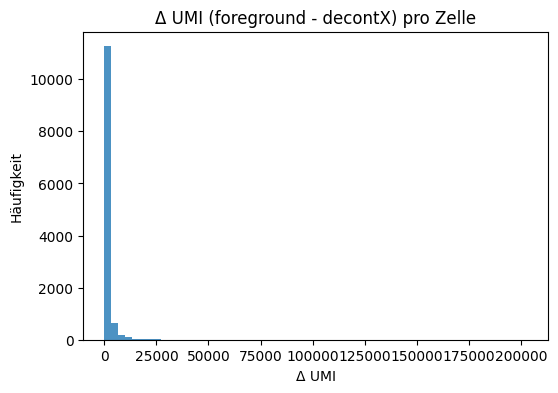

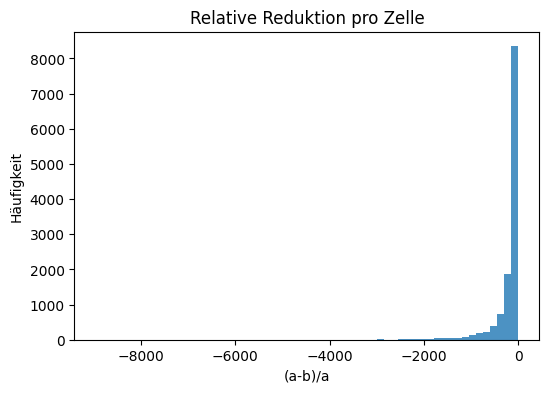

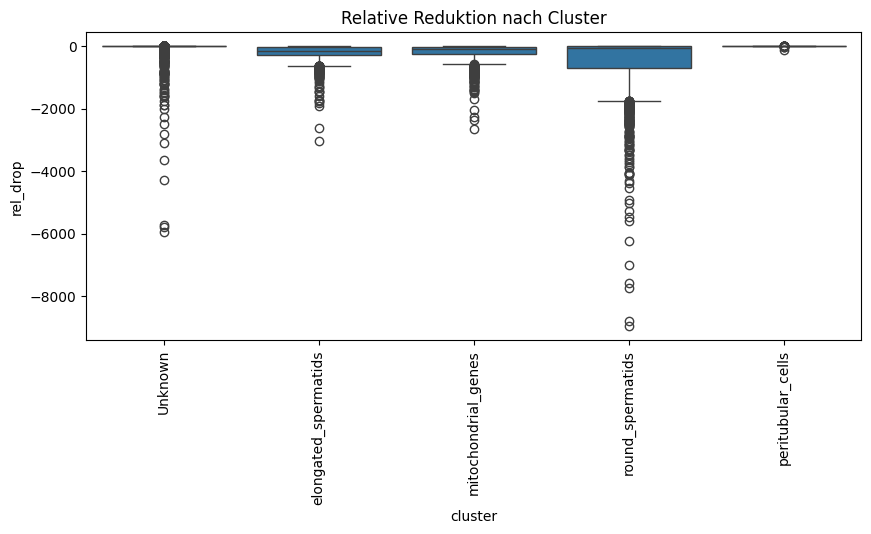

ENSSSCG00000034846    0.0
ENSSSCG00000056394    0.0
ENSSSCG00000053784    0.0
ENSSSCG00000062869    0.0
ENSSSCG00000033060    0.0
ENSSSCG00000051953    0.0
ENSSSCG00000056883    0.0
ENSSSCG00000058921    0.0
ENSSSCG00000056030    0.0
ENSSSCG00000061083    0.0
ENSSSCG00000052720    0.0
ENSSSCG00000061464    0.0
ENSSSCG00000063115    0.0
ENSSSCG00000054598    0.0
ENSSSCG00000059911    0.0
ENSSSCG00000050910    0.0
ENSSSCG00000020673    0.0
ENSSSCG00000054428    0.0
ENSSSCG00000061925    0.0
ENSSSCG00000063518    0.0
dtype: float64

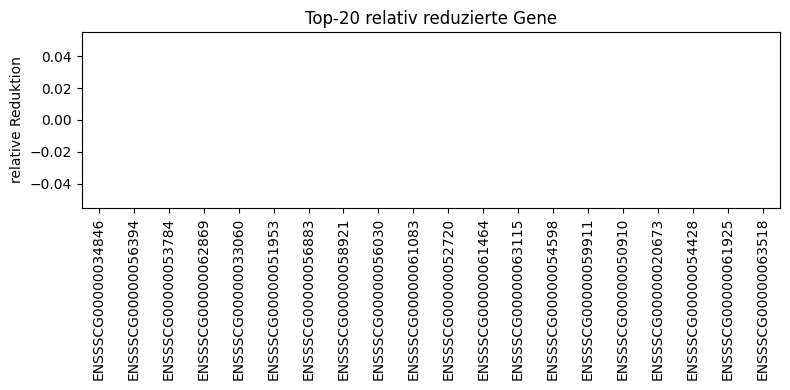

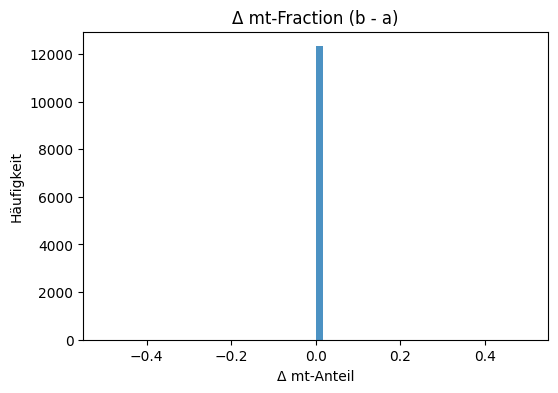

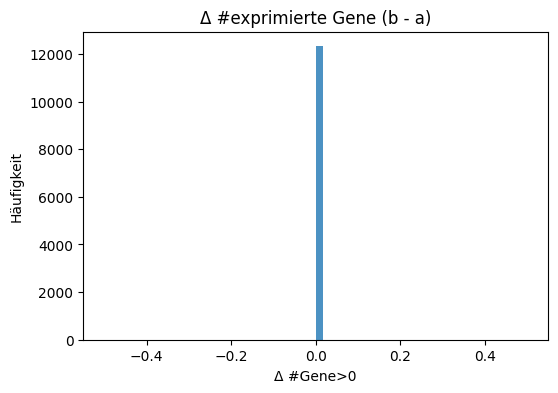

In [10]:
# First, let's check the dimensions and indices of both datasets
print("decontX shape:", decontX.shape)
print("foreground shape:", foreground.shape)
print("decontX obs_names sample:", decontX.obs_names[:5])
print("foreground obs_names sample:", foreground.obs_names[:5])
print("decontX var_names sample:", decontX.var_names[:5])
print("foreground var_names sample:", foreground.var_names[:5])

# Check if indices match
obs_match = decontX.obs_names.equals(foreground.obs_names)
var_match = decontX.var_names.equals(foreground.var_names)
print(f"Observation names match: {obs_match}")
print(f"Variable names match: {var_match}")

# If indices don't match, we need to find the intersection
if not obs_match or not var_match:
    print("Indices don't match - finding intersection...")
    
    # Find common observations and variables
    common_obs = decontX.obs_names.intersection(foreground.obs_names)
    common_vars = decontX.var_names.intersection(foreground.var_names)
    
    print(f"Common observations: {len(common_obs)} out of {len(decontX.obs_names)} (decontX) and {len(foreground.obs_names)} (foreground)")
    print(f"Common variables: {len(common_vars)} out of {len(decontX.var_names)} (decontX) and {len(foreground.var_names)} (foreground)")
    
    # Subset both datasets to common indices
    decontX_subset = decontX[common_obs, common_vars].copy()
    foreground_subset = foreground[common_obs, common_vars].copy()
    
    print(f"Subsetted decontX shape: {decontX_subset.shape}")
    print(f"Subsetted foreground shape: {foreground_subset.shape}")
else:
    # If indices match, we can proceed directly
    decontX_subset = decontX.copy()
    foreground_subset = foreground.copy()

import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

def vec(x):
    # flacht auch sparse-Matrizen korrekt ab
    return np.asarray(x).ravel()

# 1) Per-Zelle Metriken
a_counts = vec(decontX_subset.X.sum(axis=1))
b_counts = vec(foreground_subset.X.sum(axis=1))

delta = b_counts - a_counts
rel_drop = (a_counts - b_counts) / np.maximum(a_counts, 1)

plt.figure(figsize=(6,4))
plt.hist(delta, bins=60, alpha=0.8)
plt.title("Δ UMI (foreground - decontX) pro Zelle"); plt.xlabel("Δ UMI"); plt.ylabel("Häufigkeit")
plt.show()

plt.figure(figsize=(6,4))
plt.hist(rel_drop, bins=60, alpha=0.8)
plt.title("Relative Reduktion pro Zelle"); plt.xlabel("(a-b)/a"); plt.ylabel("Häufigkeit")
plt.show()

# Optional: nach Cluster
if 'cluster_annotation' in decontX_subset.obs:
    df = pd.DataFrame({'rel_drop': rel_drop, 'cluster': decontX_subset.obs['cluster_annotation'].astype(str).values})
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df, x='cluster', y='rel_drop')
    plt.xticks(rotation=90); plt.title("Relative Reduktion nach Cluster")
    plt.show()

# 2) Per-Gen Metriken
a_gene = vec(decontX_subset.X.sum(axis=0))
b_gene = vec(foreground_subset.X.sum(axis=0))
gene_rel_drop = (a_gene - b_gene) / np.maximum(a_gene, 1)
top = pd.Series(gene_rel_drop, index=decontX_subset.var_names).sort_values(ascending=False).head(20)
display(top)

plt.figure(figsize=(8,4))
top.plot(kind='bar'); plt.title("Top-20 relativ reduzierte Gene"); plt.ylabel("relative Reduktion")
plt.tight_layout(); plt.show()

# 3) Ambient-/QC: mt-Anteil und Sparsity
mt = decontX_subset.var_names.str.startswith(('MT-','Mt-','mt-'))
a_mt = vec(decontX_subset[:, mt].X.sum(axis=1))
b_mt = vec(foreground_subset[:, mt].X.sum(axis=1))

a_mt_frac = a_mt / np.maximum(a_counts, 1)
b_mt_frac = b_mt / np.maximum(b_counts, 1)
mt_frac_delta = b_mt_frac - a_mt_frac  # negativ = gewünschte Reduktion

plt.figure(figsize=(6,4))
plt.hist(mt_frac_delta, bins=60, alpha=0.8)
plt.title("Δ mt-Fraction (b - a)"); plt.xlabel("Δ mt-Anteil"); plt.ylabel("Häufigkeit")
plt.show()

# Sparsity (Anzahl Gene >0)
a_nnz = vec((decontX_subset.X > 0).sum(axis=1))
b_nnz = vec((foreground_subset.X > 0).sum(axis=1))
plt.figure(figsize=(6,4))
plt.hist(b_nnz - a_nnz, bins=60, alpha=0.8)
plt.title("Δ #exprimierte Gene (b - a)"); plt.xlabel("Δ #Gene>0"); plt.ylabel("Häufigkeit")
plt.show()

# 4) Optional, falls vorhanden: decontX-Score
if 'decontX_contamination' in foreground_subset.obs.columns:
    import scipy.stats as st
    r, p = st.pearsonr(foreground_subset.obs['decontX_contamination'].values, rel_drop)
    plt.figure(figsize=(5,4))
    plt.scatter(foreground_subset.obs['decontX_contamination'].values, rel_drop, s=4, alpha=0.4)
    plt.xlabel("decontX_contamination"); plt.ylabel("relative Reduktion"); plt.title(f"r={r:.2f}, p={p:.1e}")
    plt.show()


# GSEA decontX clusters

In [1]:
import sys
sys.path.insert(1, '/Users/oskarhaupt/Documents/DE/2024_FU-Bachelor/WS-24-25/Charité/05_sorted/GSEA_new')
from gene_pathway_analysis import SpermatogenesisAnalyzer # main file for GSEA analysis. creates h5ad file with GSEA processed data

/Users/oskarhaupt/Library/Python/3.9/lib/python/site-packages/louvain/__init__.py:54: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


Output directory created: 55_GSEA_decontX_clusters/GSEA_20251021_003122
Defined 29 trajectory markers of germ cells (5 categories)
Cell type markers: 62 total including leydig/sertoli etc
Original data shape: (12315, 22040)
Data loaded and QC metrics calculated


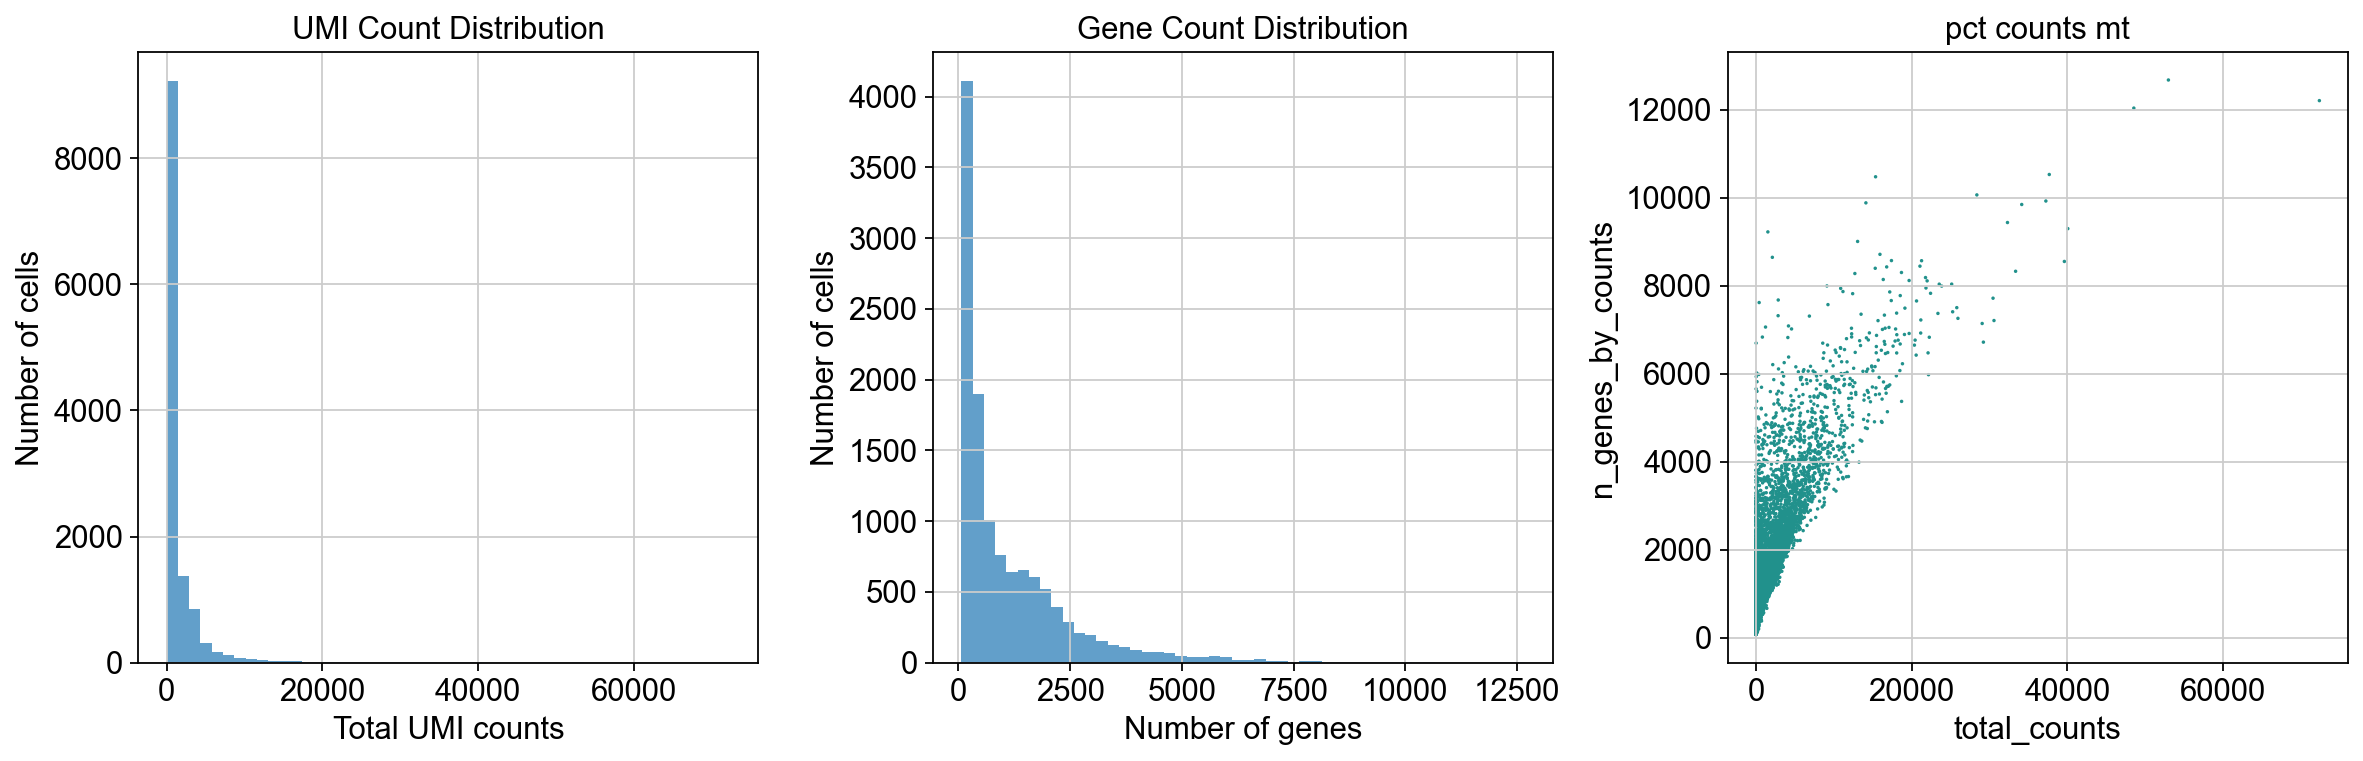


NORMALIZATION & SCALING
Parameters saved to: 55_GSEA_decontX_clusters/GSEA_20251021_003122/parameters.txt
NO custom hvg filter but just for your information:
There would be 3885 highly variable genes available

ADVANCED DIMENSIONALITY REDUCTION


Compute diffusion-based UMAP: 100%|██████████| 4/4 [00:45<00:00, 11.29s/step]



SPERMATOGENESIS TRAJECTORY INFERENCE
Root cluster set: 13

GSEA PATHWAY ANALYSIS
Progression groups: progression_group
EARLY    6309
LATE     6006
Name: count, dtype: int64
(1/1) Running GSEA with GO_Biological_Process_2023...
   -> 2440 pathways found

TOP PATHWAYS (first database):
                                                Term        ES       NES  \
0               Cytoplasmic Translation (GO:0002181) -0.841964  -2.69705   
1    Macromolecule Biosynthetic Process (GO:0009059) -0.641238  -2.67365   
2          Peptide Biosynthetic Process (GO:0043043) -0.671177 -2.657125   
3                       Gene Expression (GO:0010467) -0.576636 -2.649295   
4  Negative Regulation Of Gene Expression (GO:001... -0.533588 -2.571579   
5  Ribonucleoprotein Complex Biogenesis (GO:0022613) -0.569237 -2.544461   
6          protein-RNA Complex Assembly (GO:0022618) -0.579233 -2.535393   
7            Regulation Of RNA Splicing (GO:0043484) -0.620474 -2.532142   
8  Regulation Of mRNA Splicing

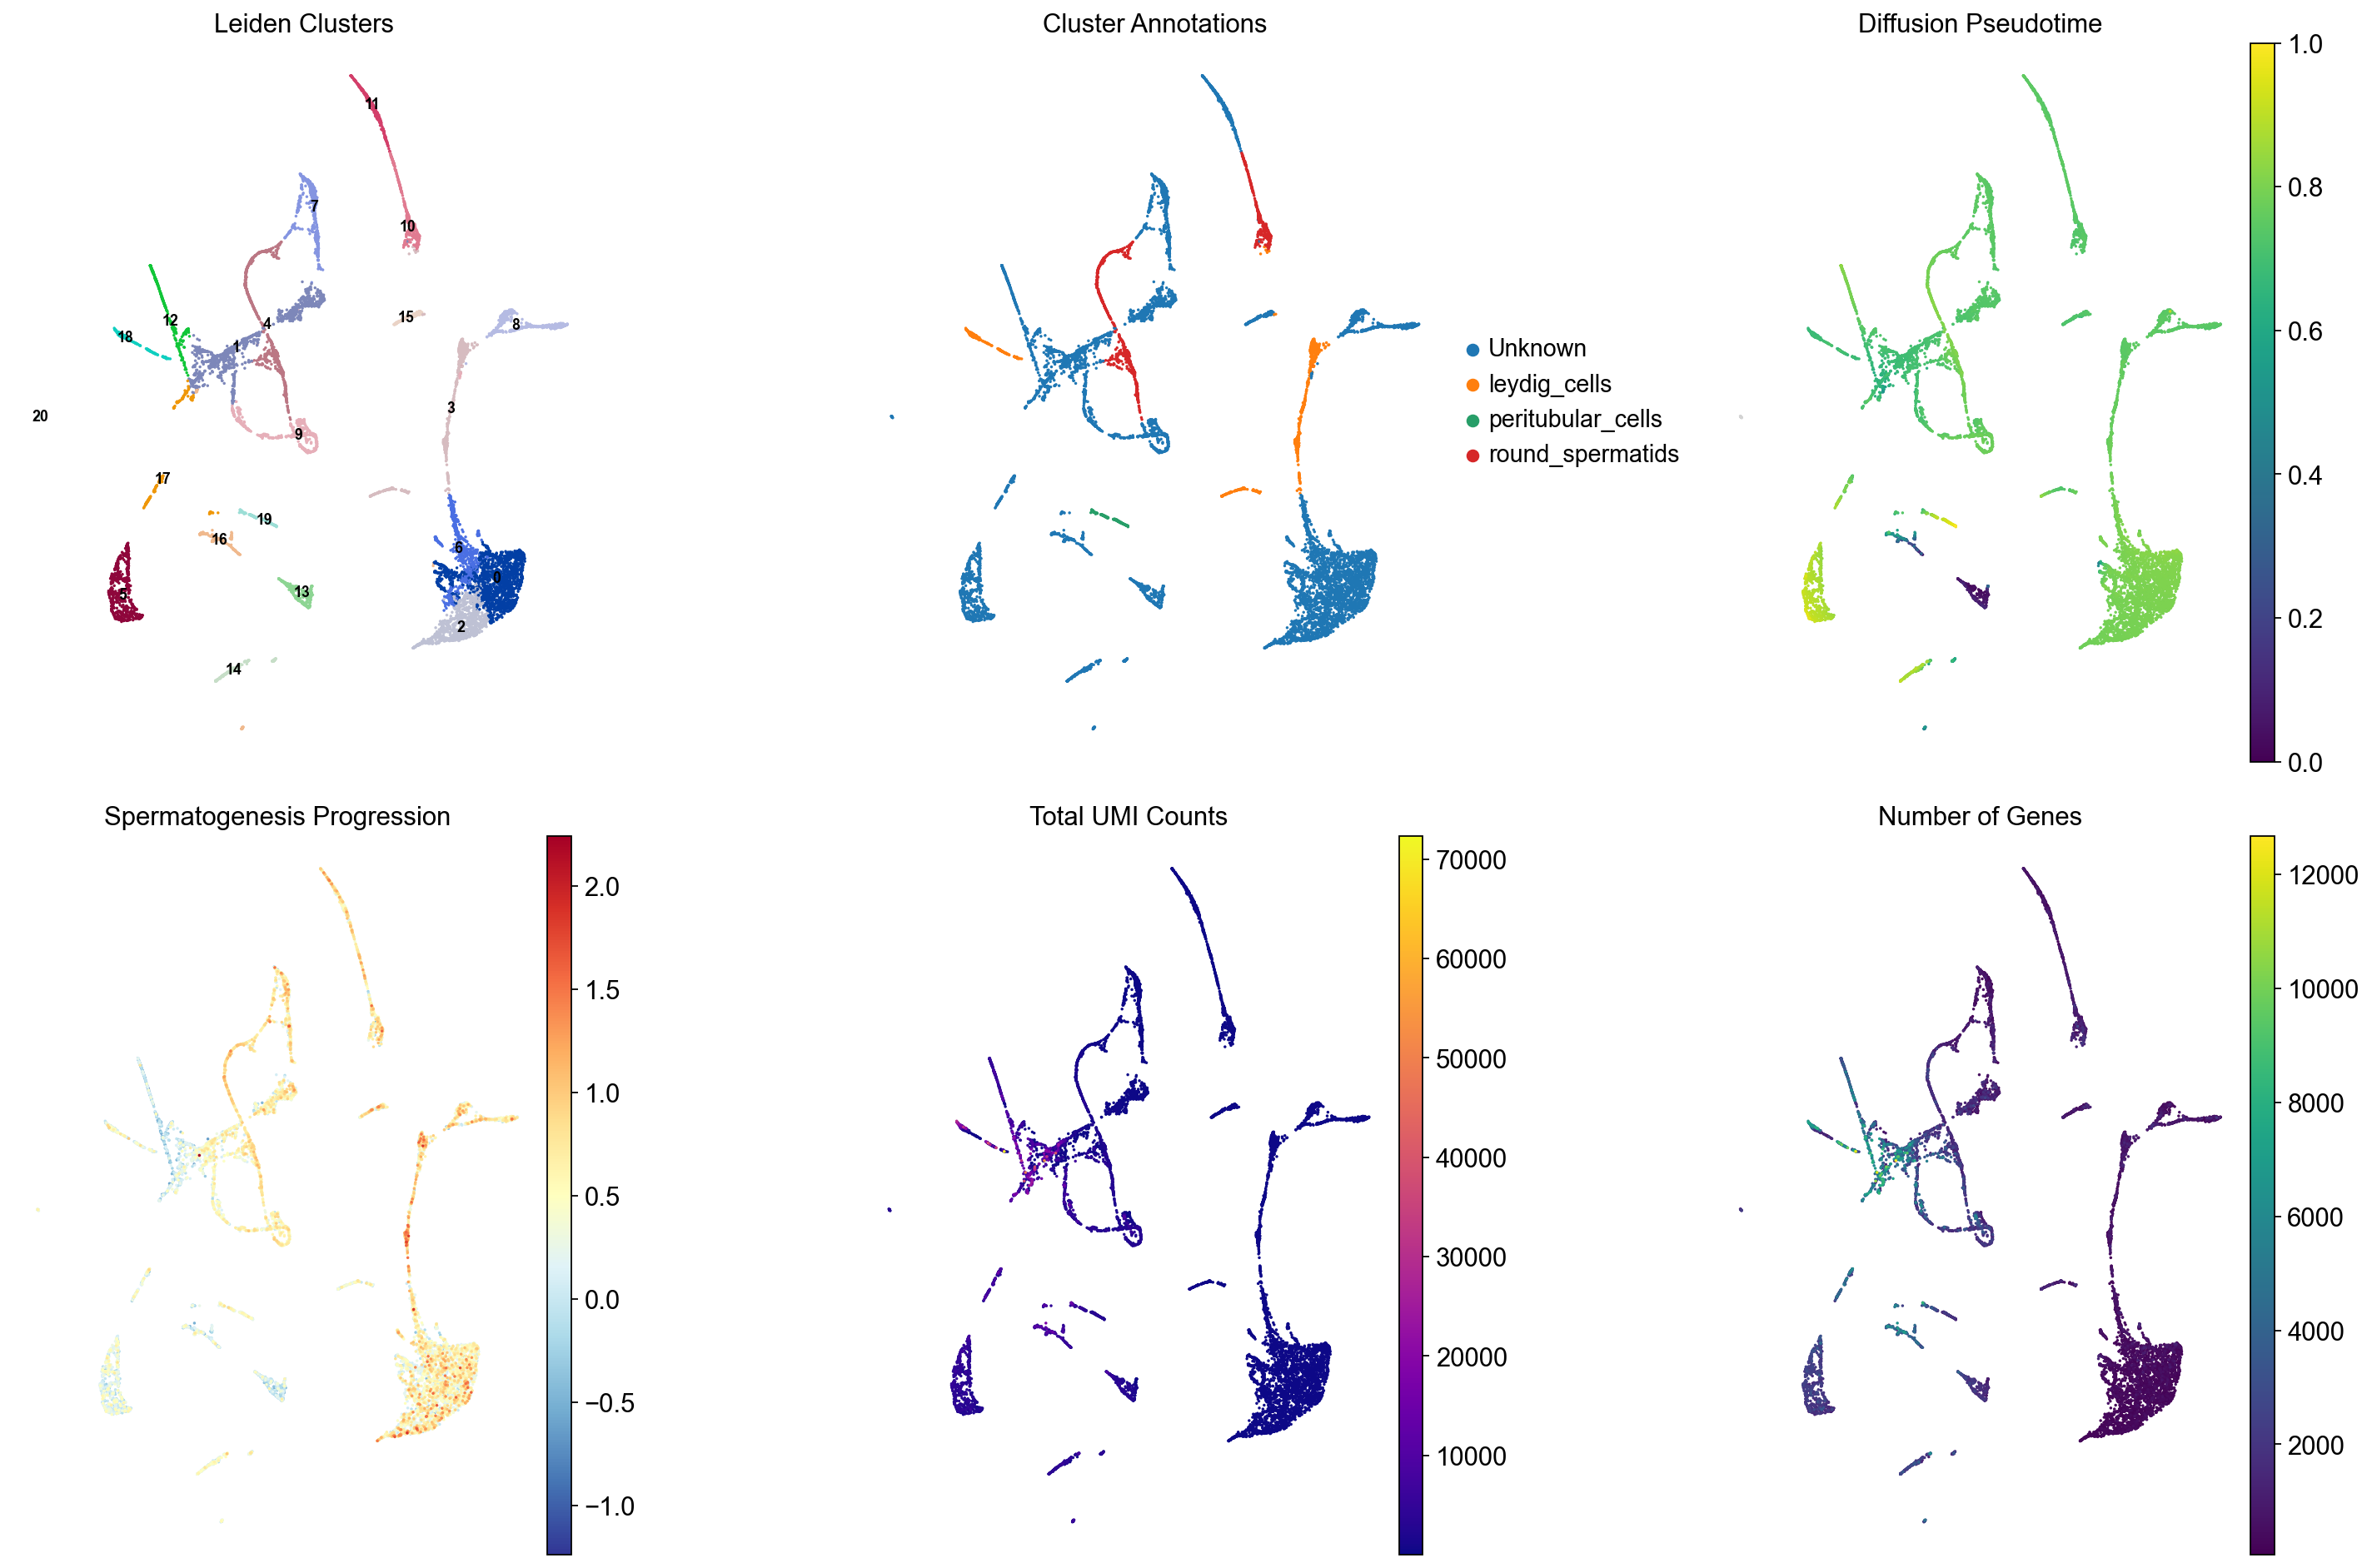


Creating cluster-specific marker plots...
!!!! No markers available for cluster 0


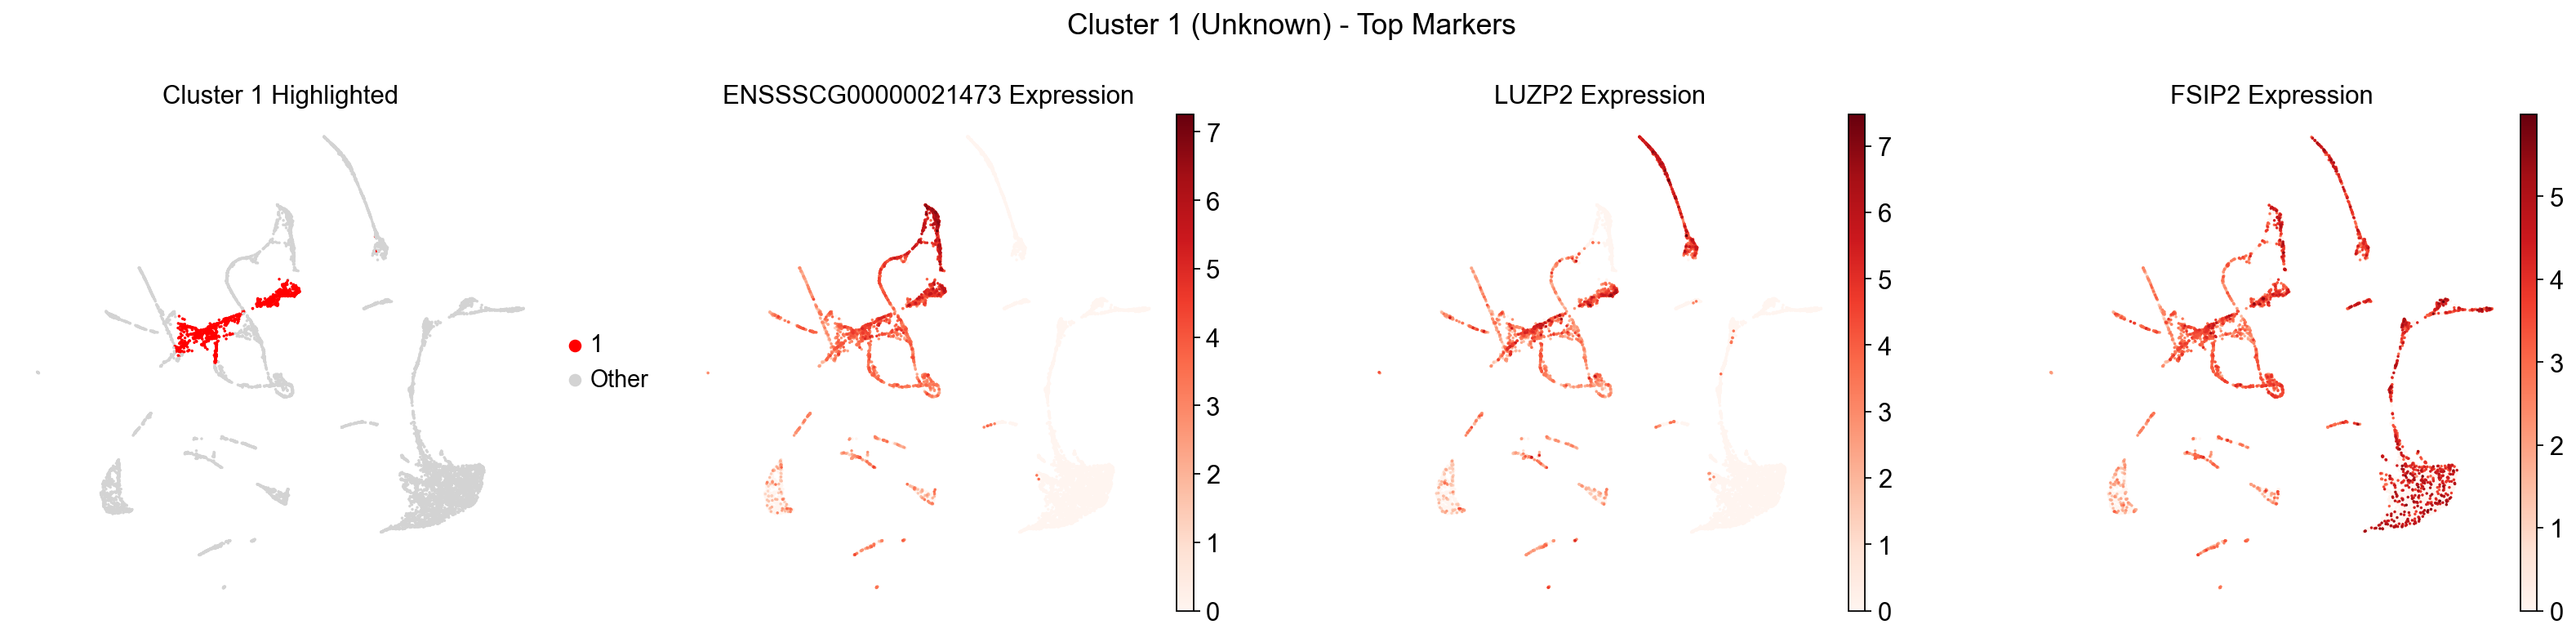

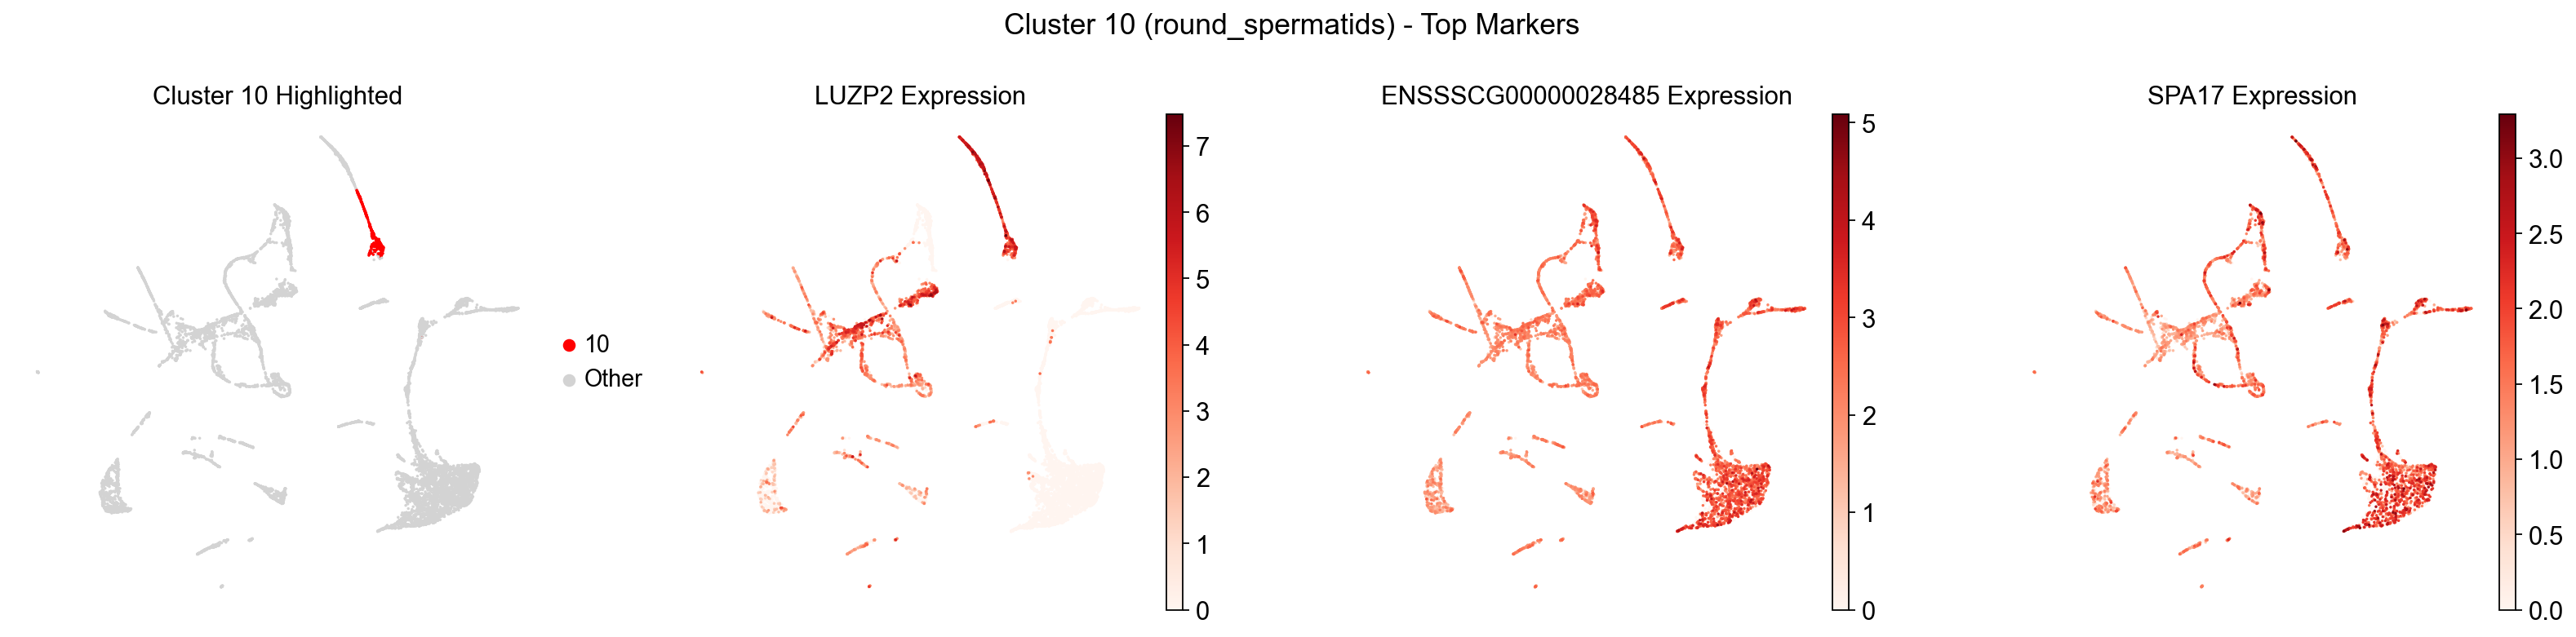

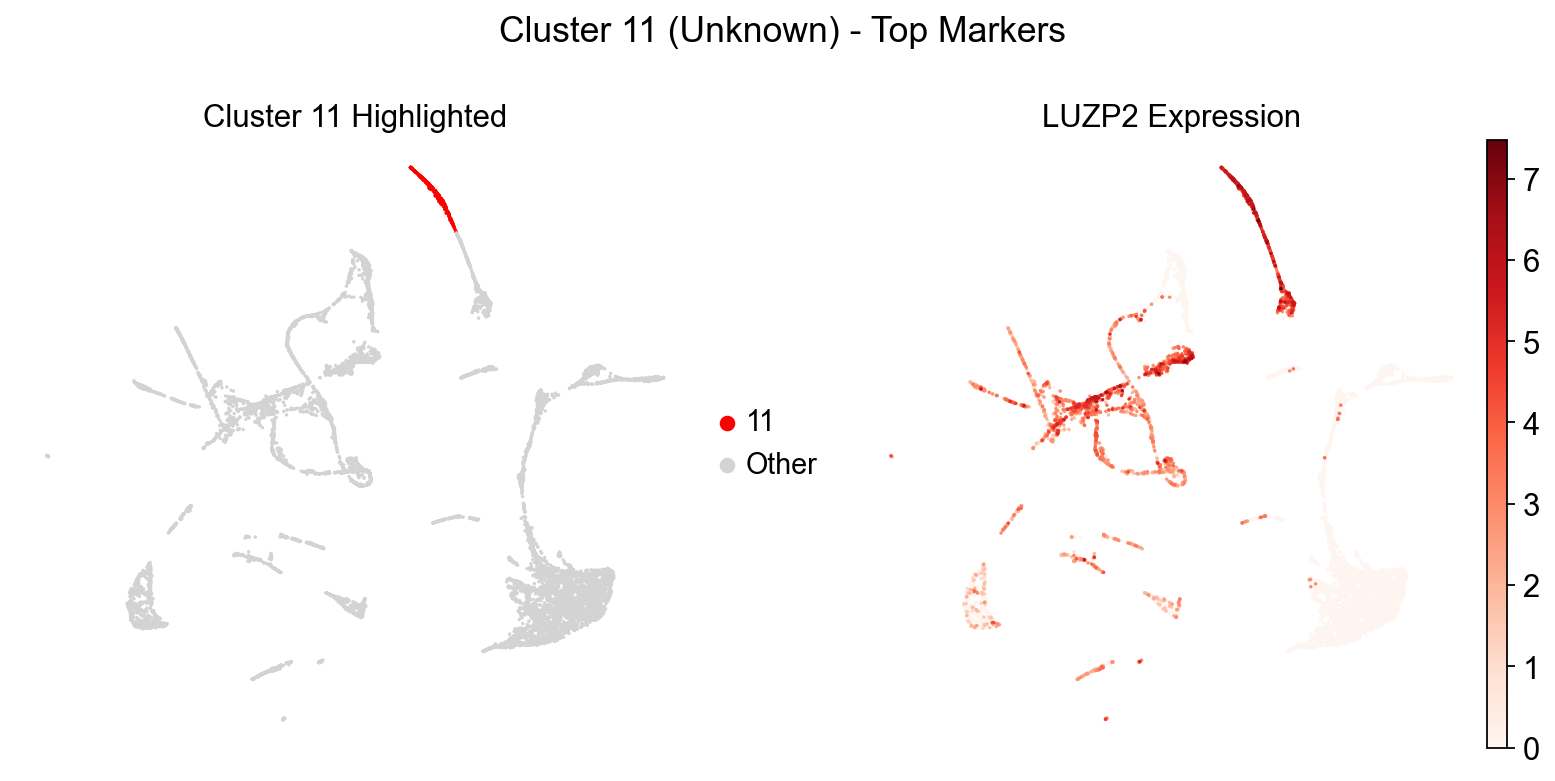

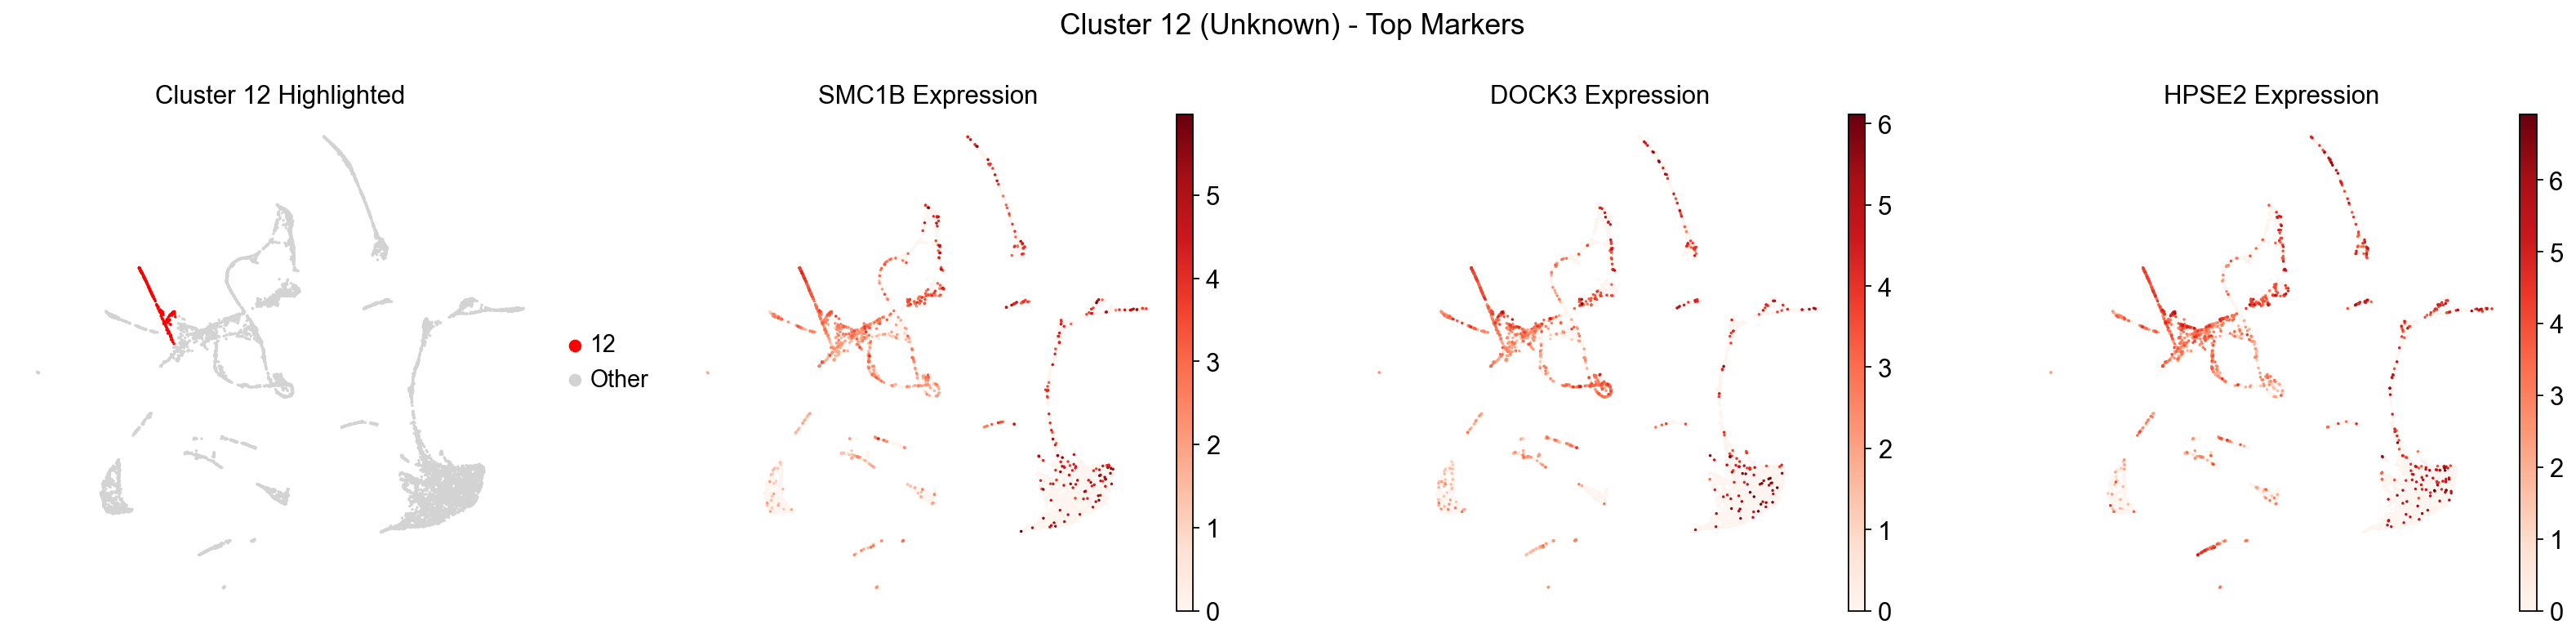

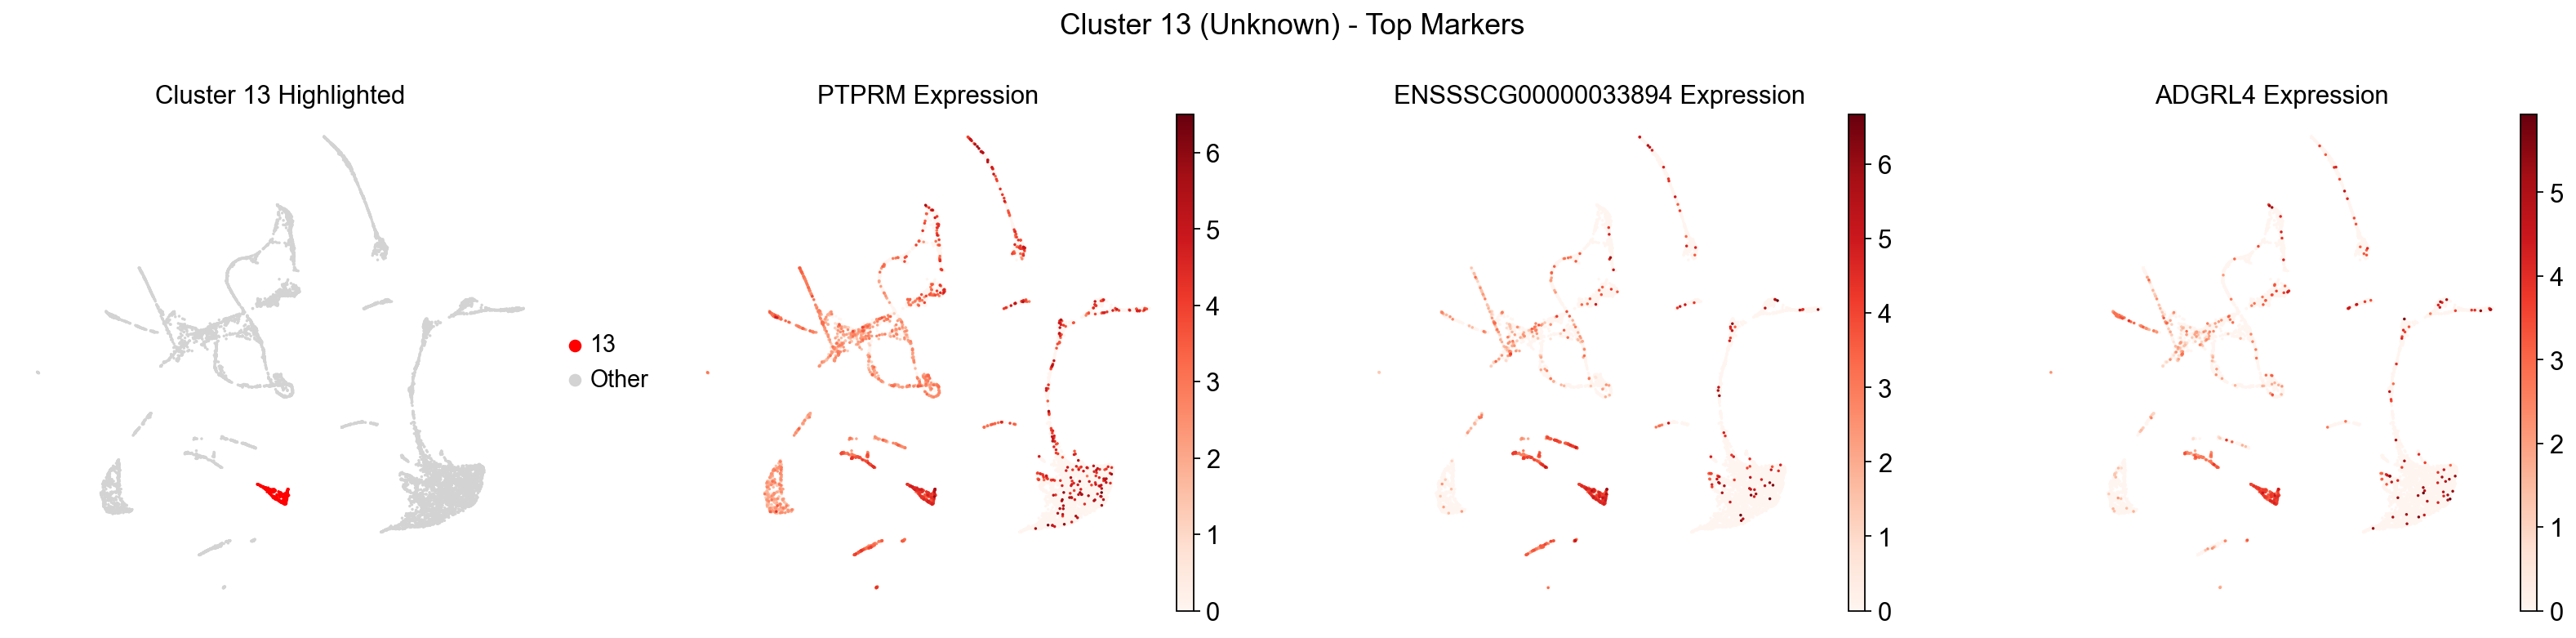

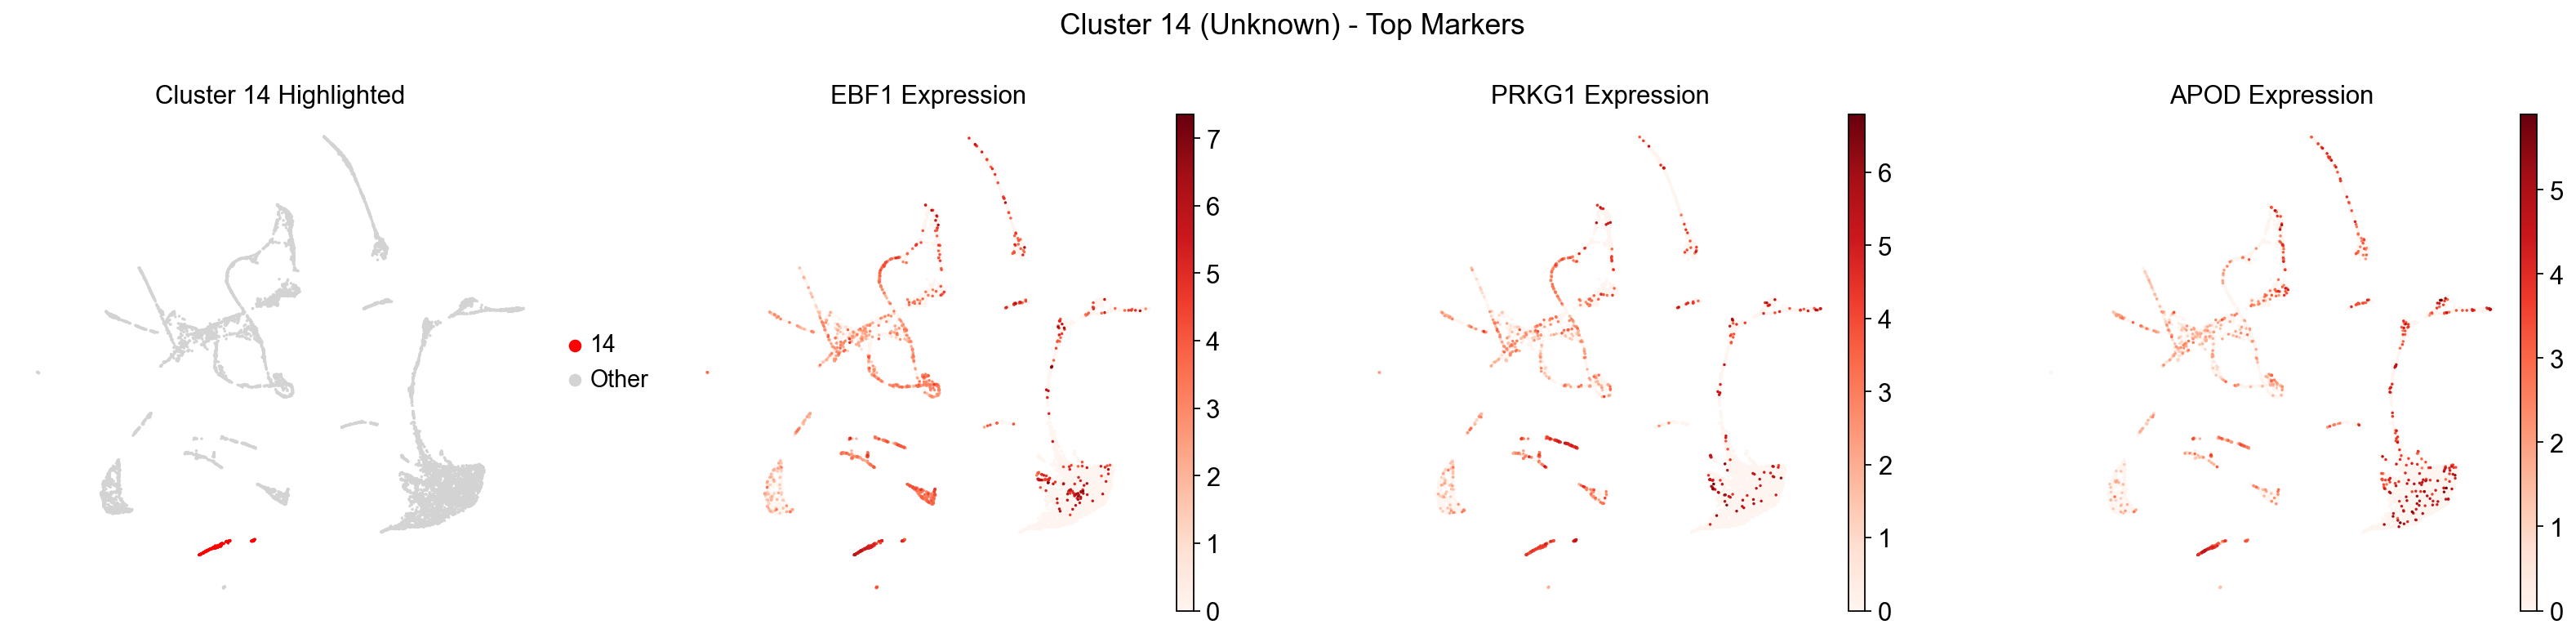

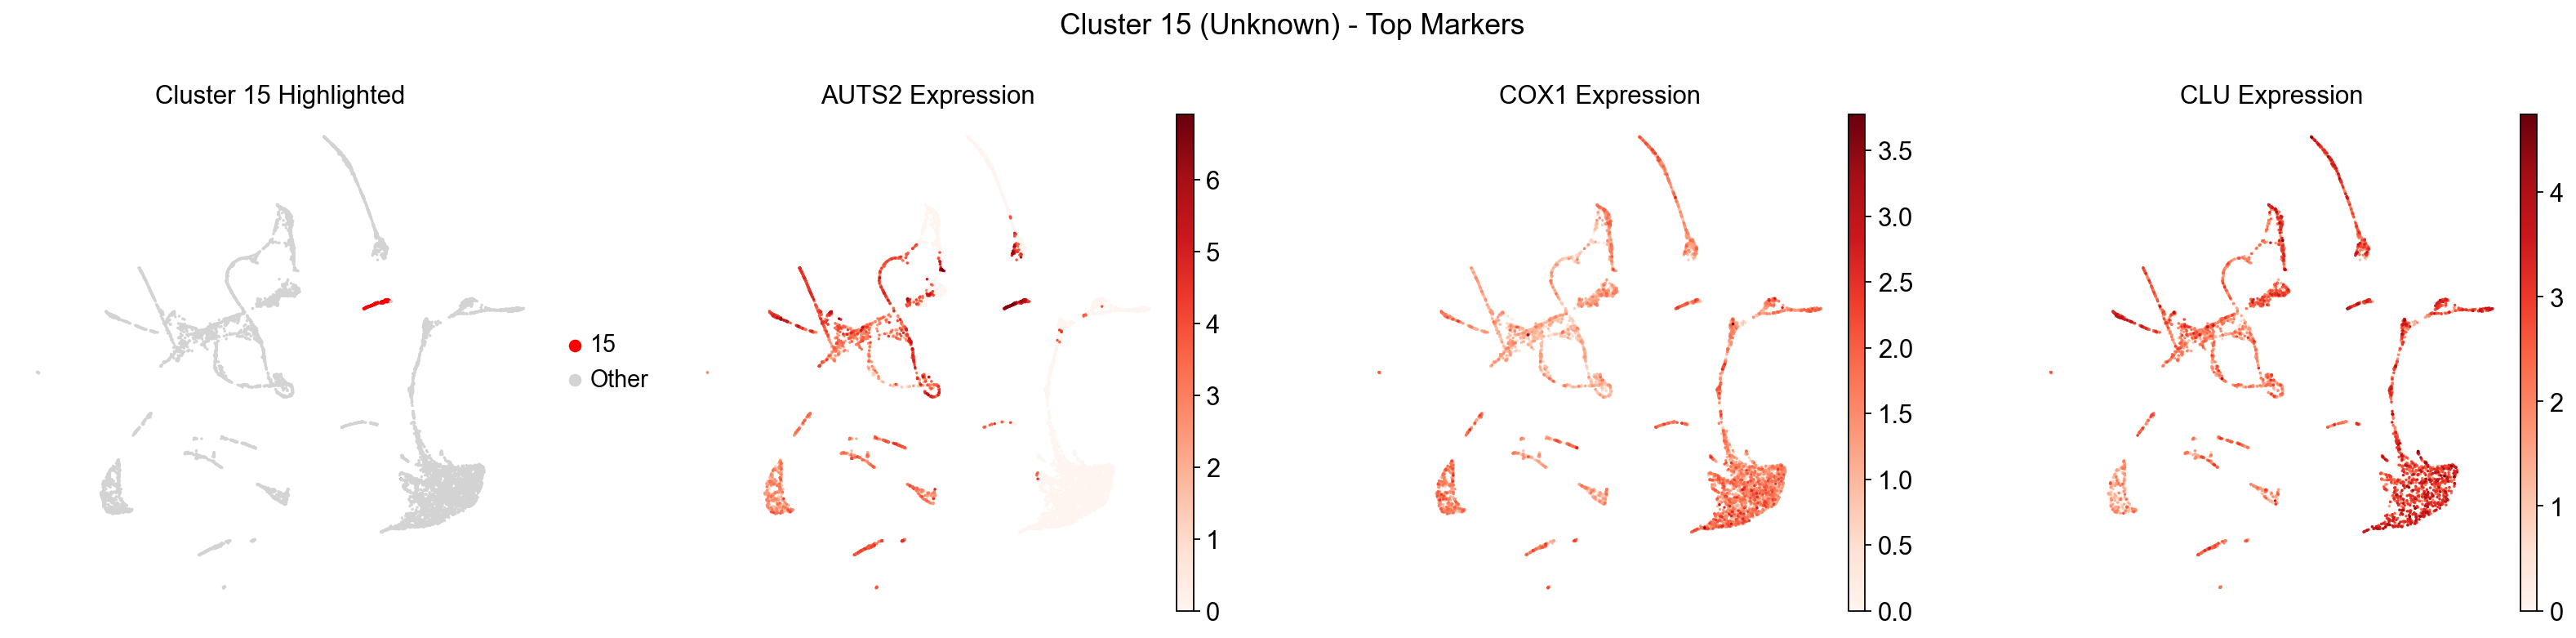

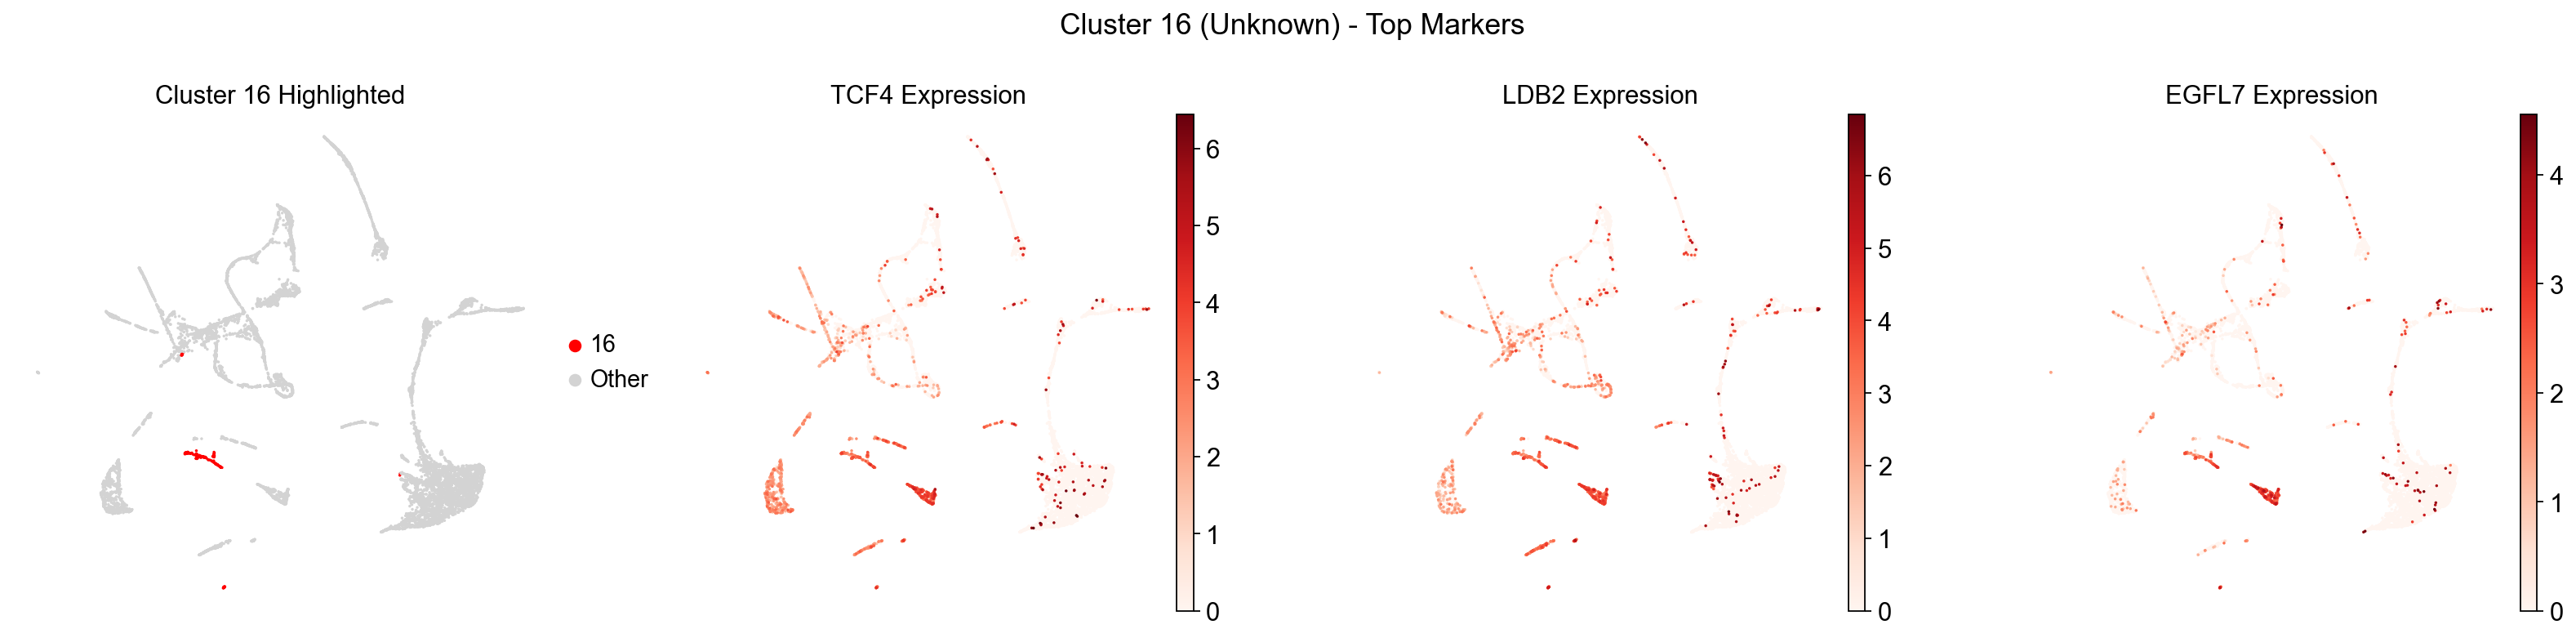

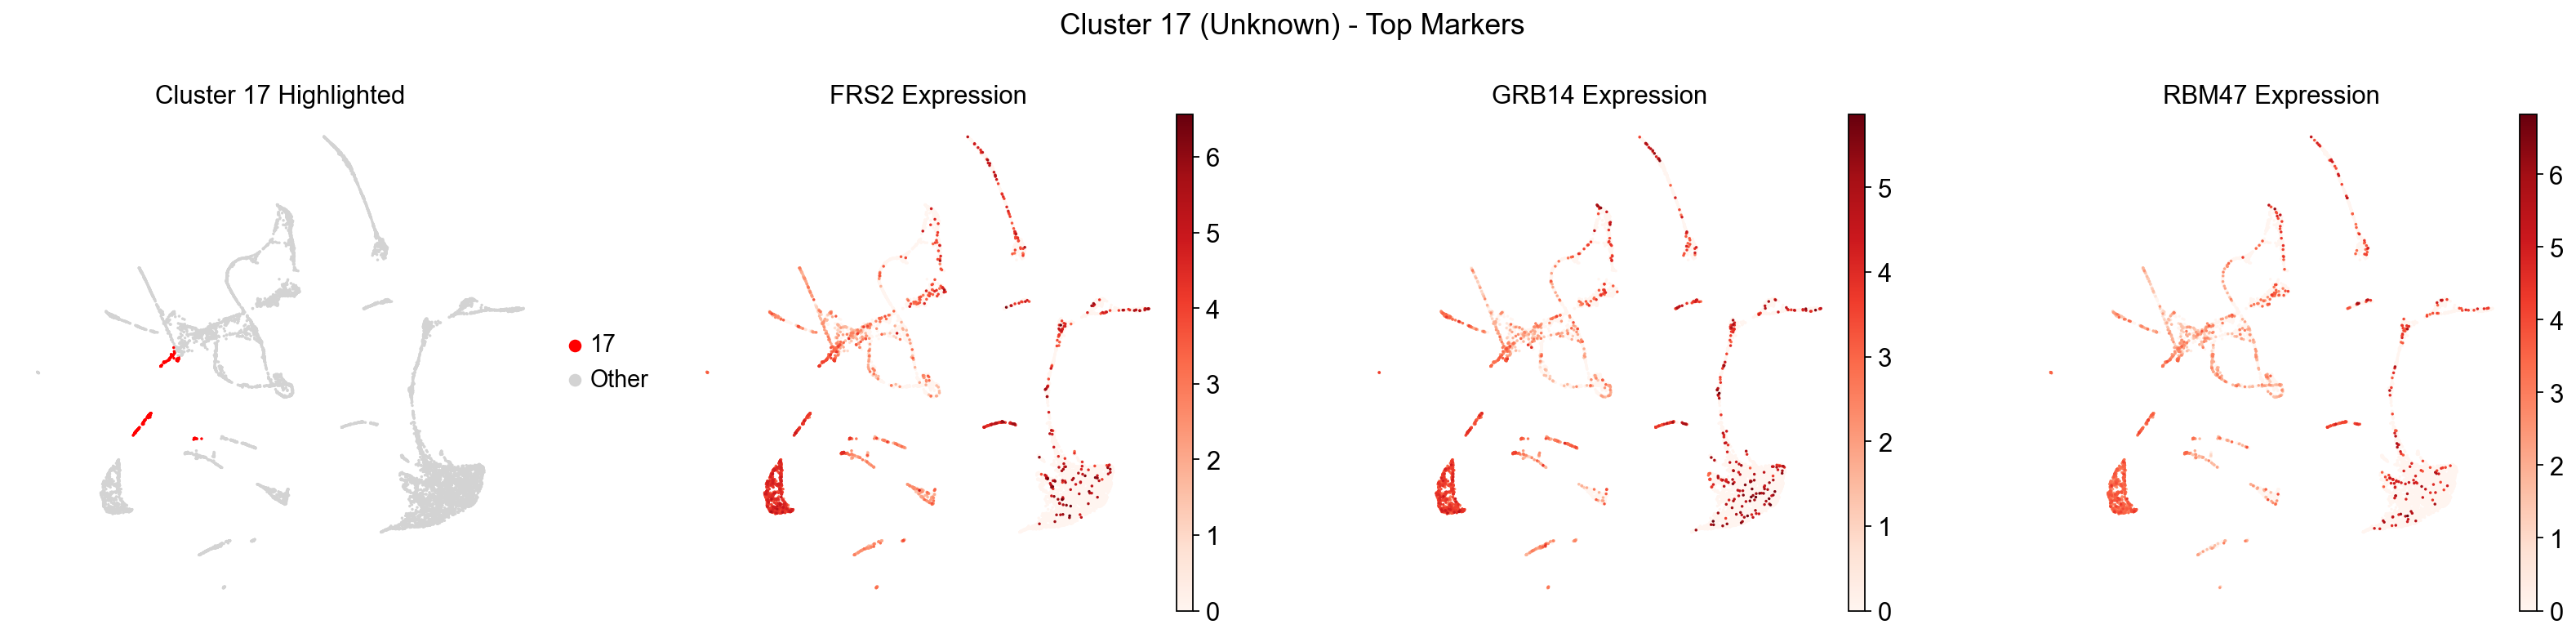

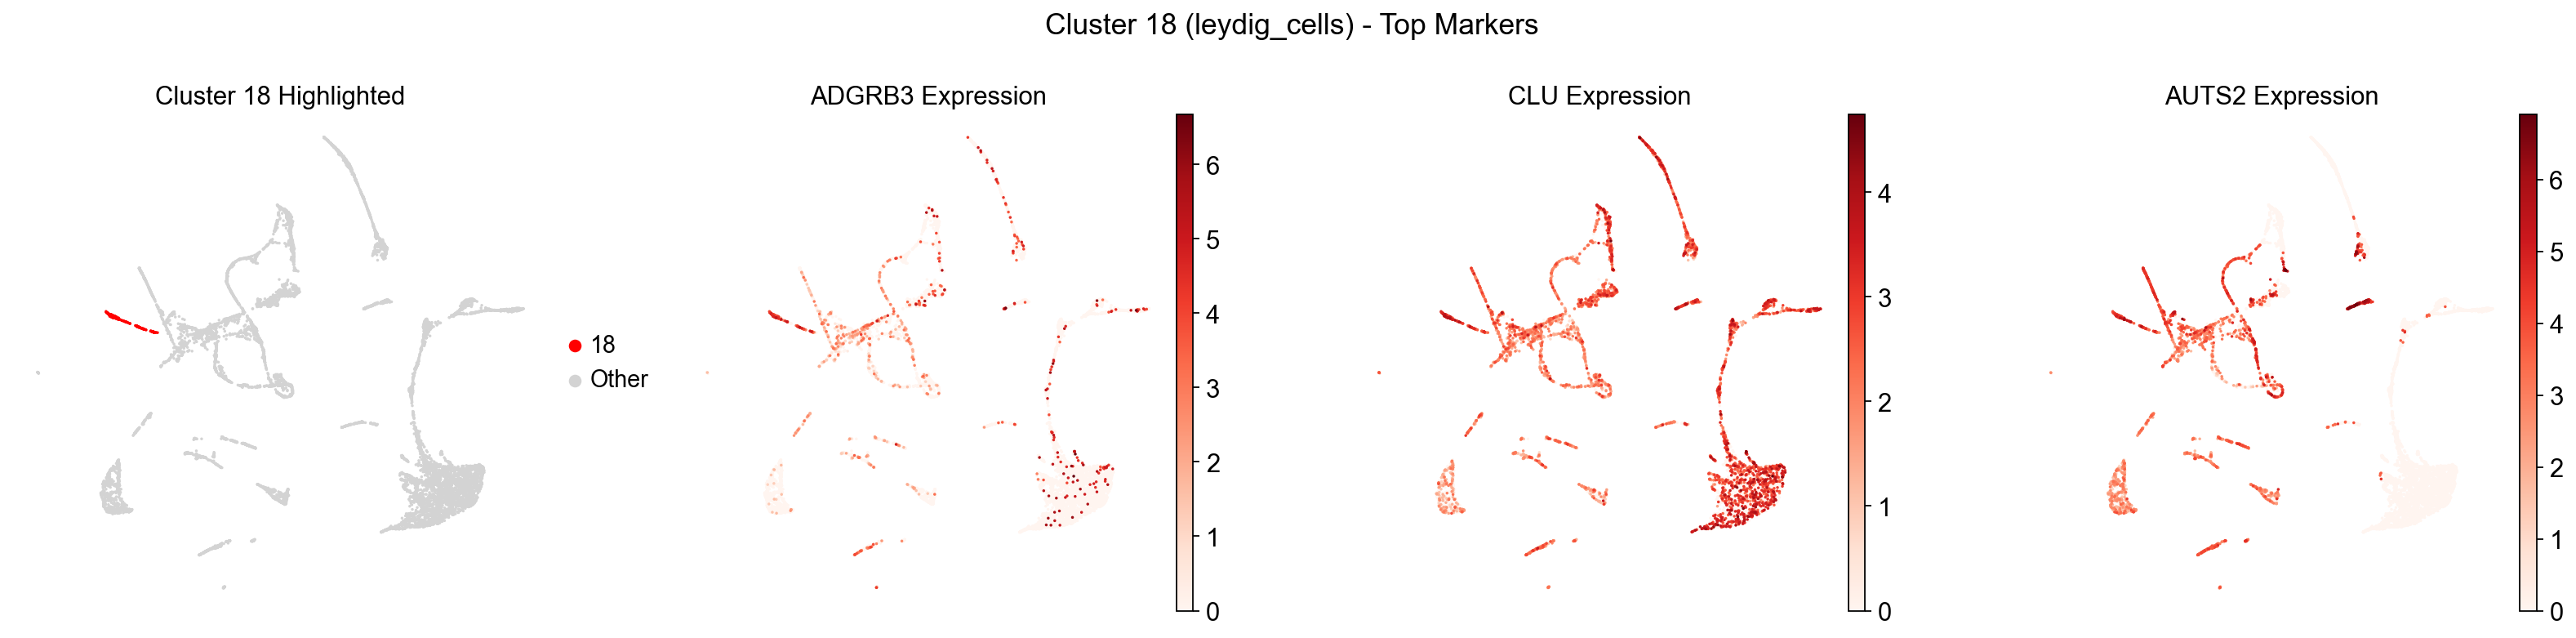

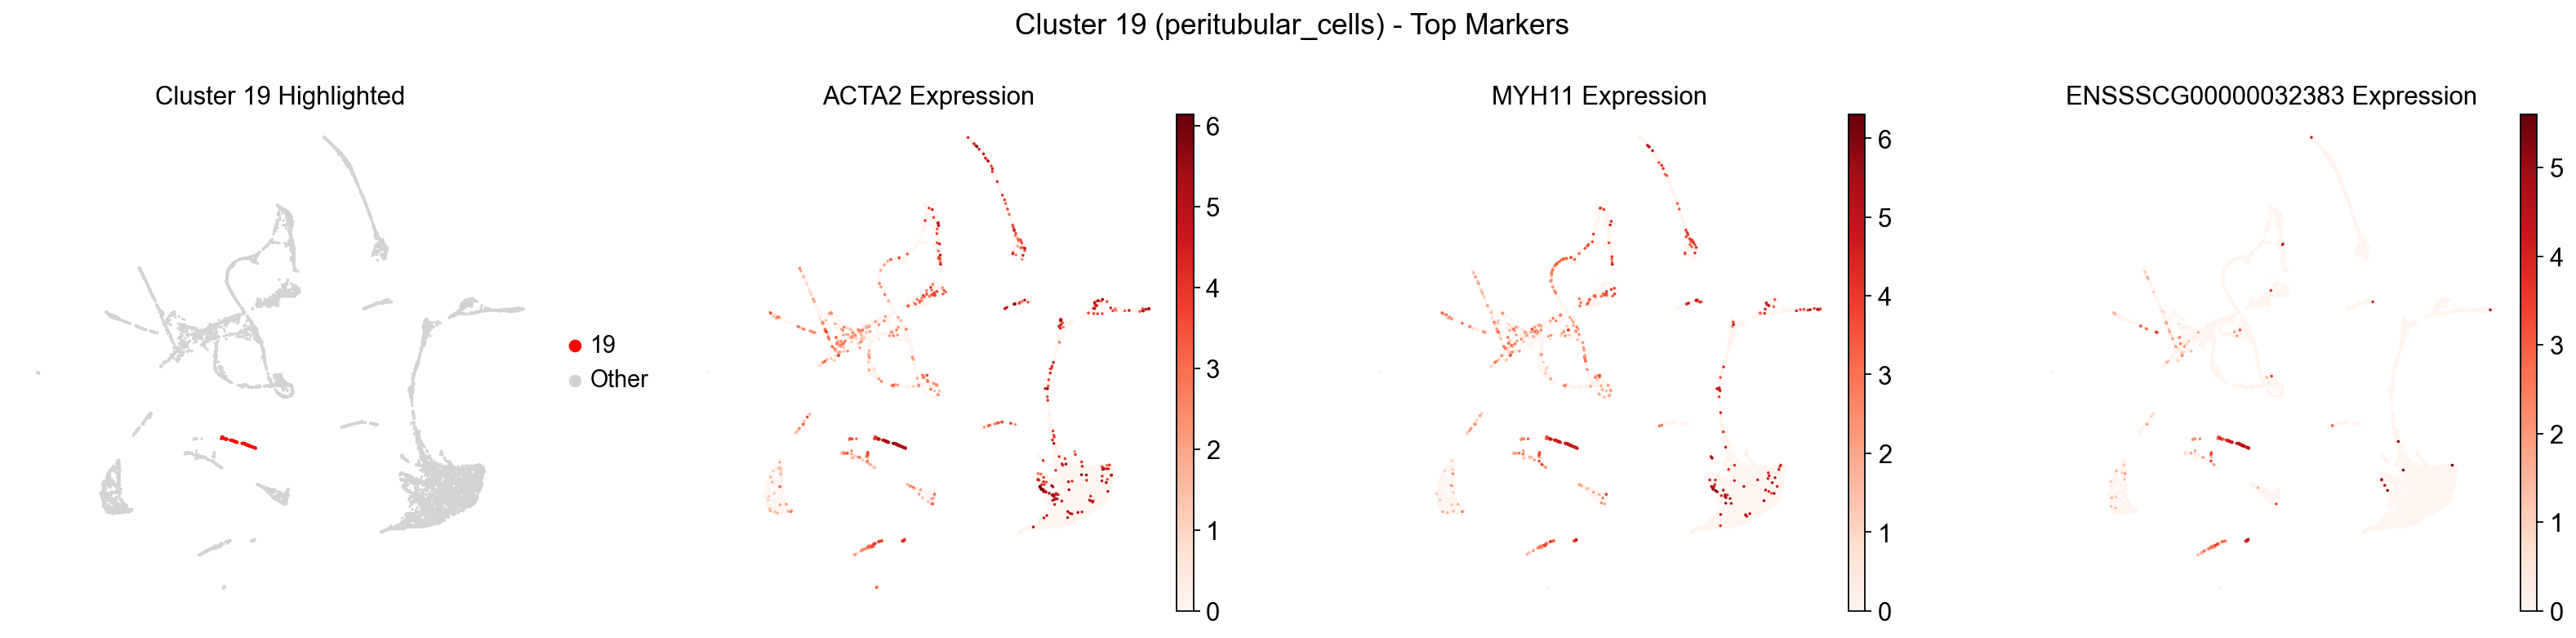

!!!! No markers available for cluster 2


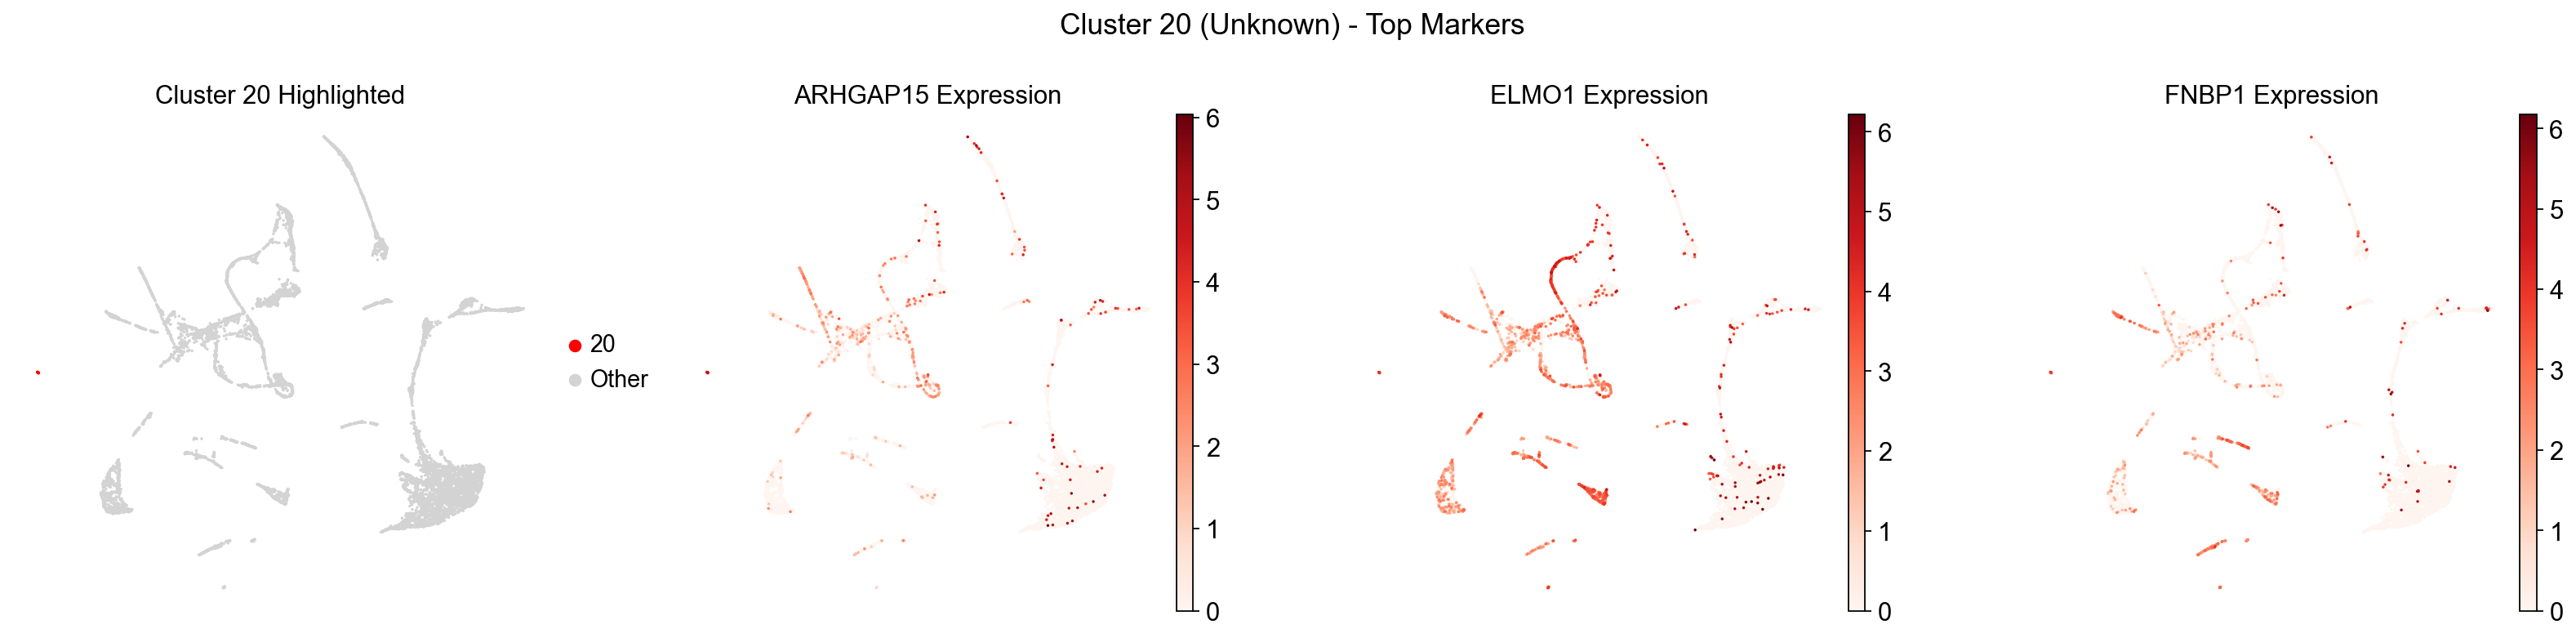

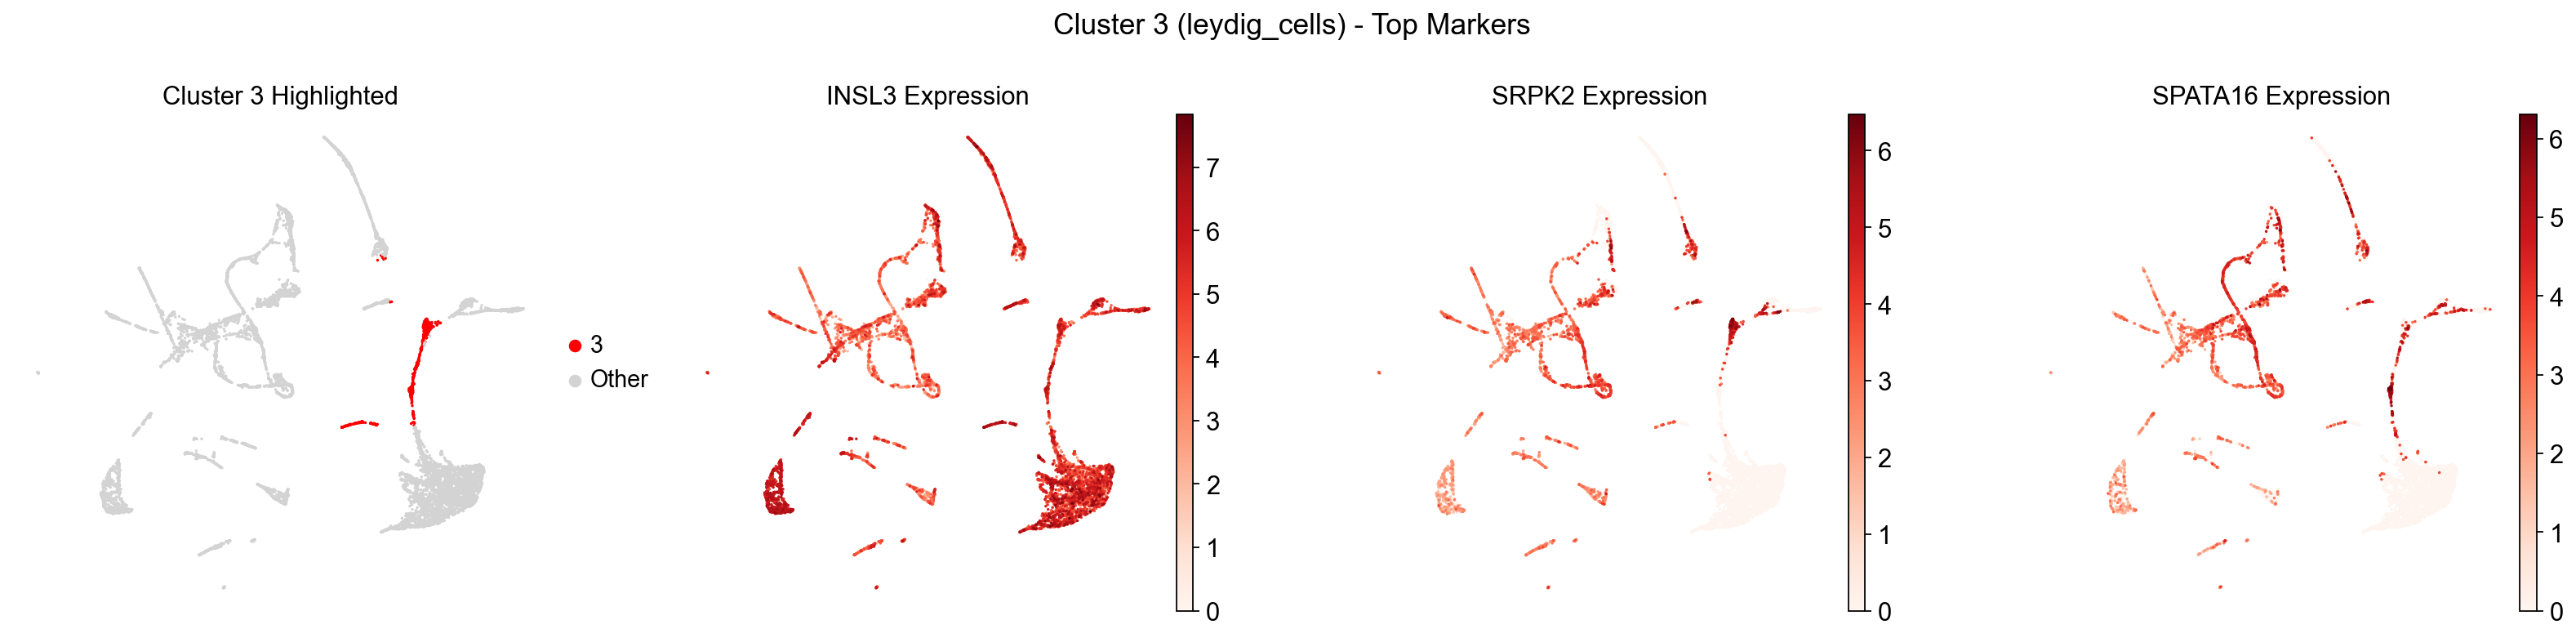

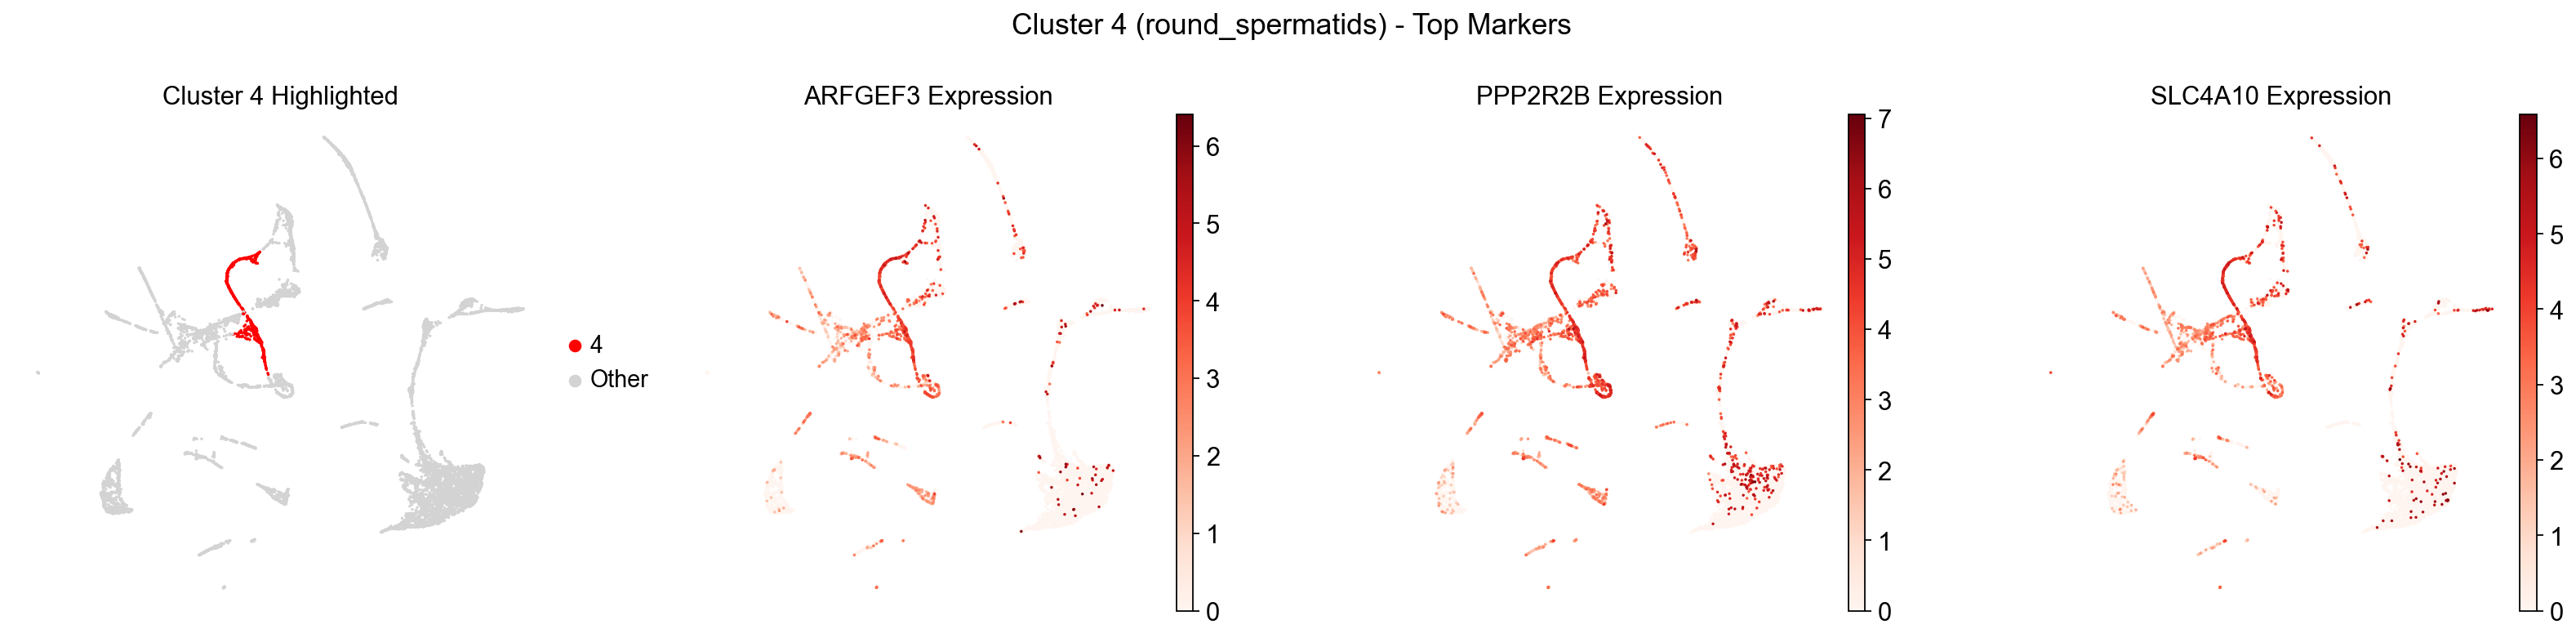

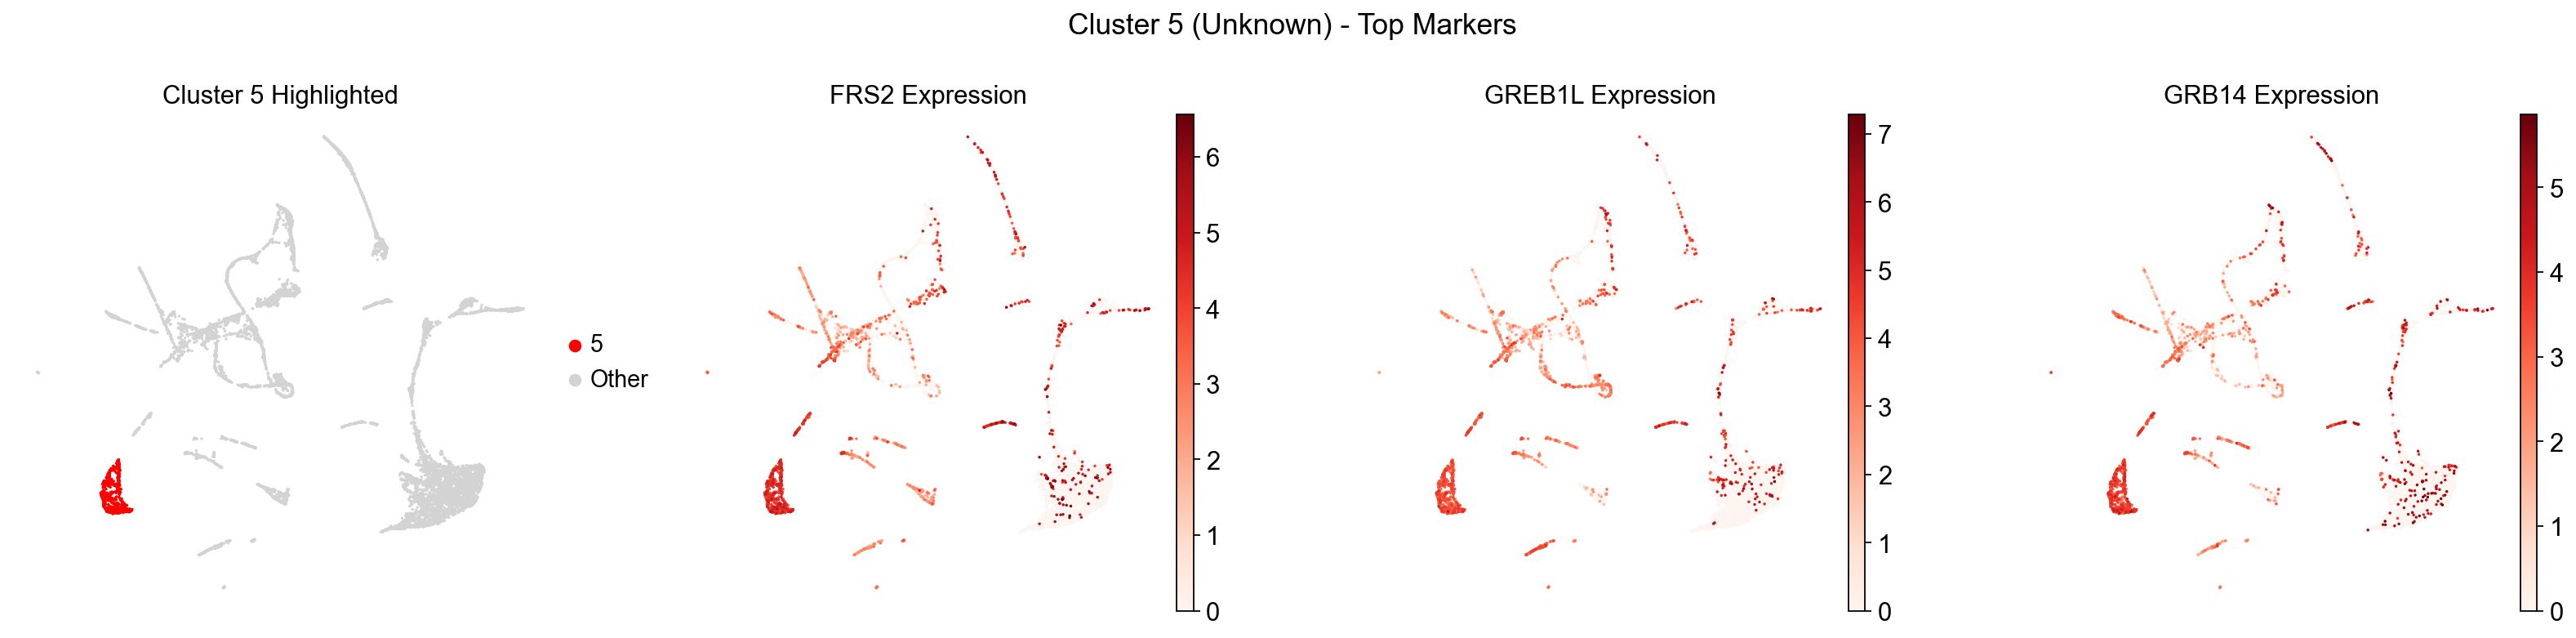

!!!! No markers available for cluster 6


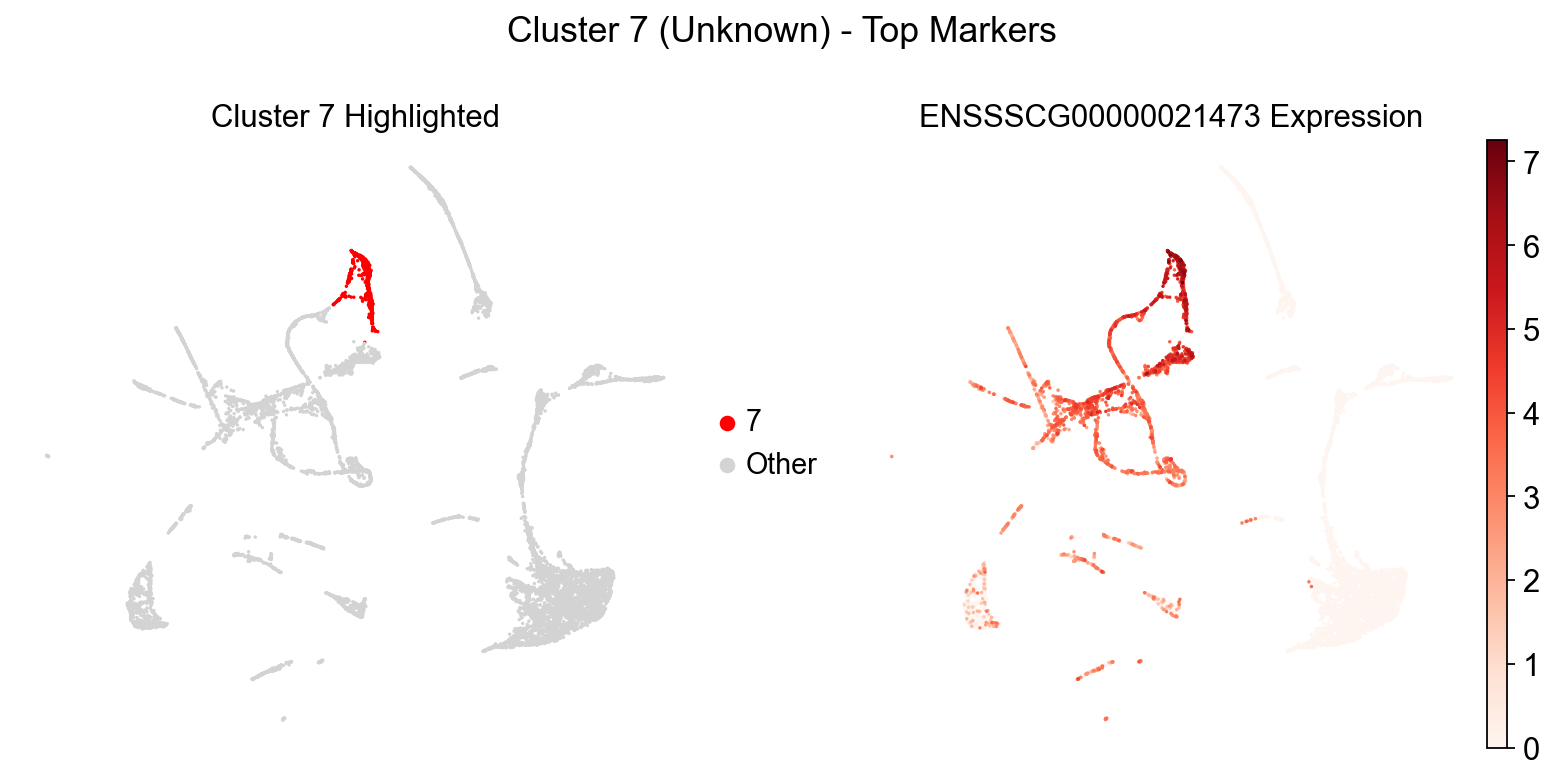

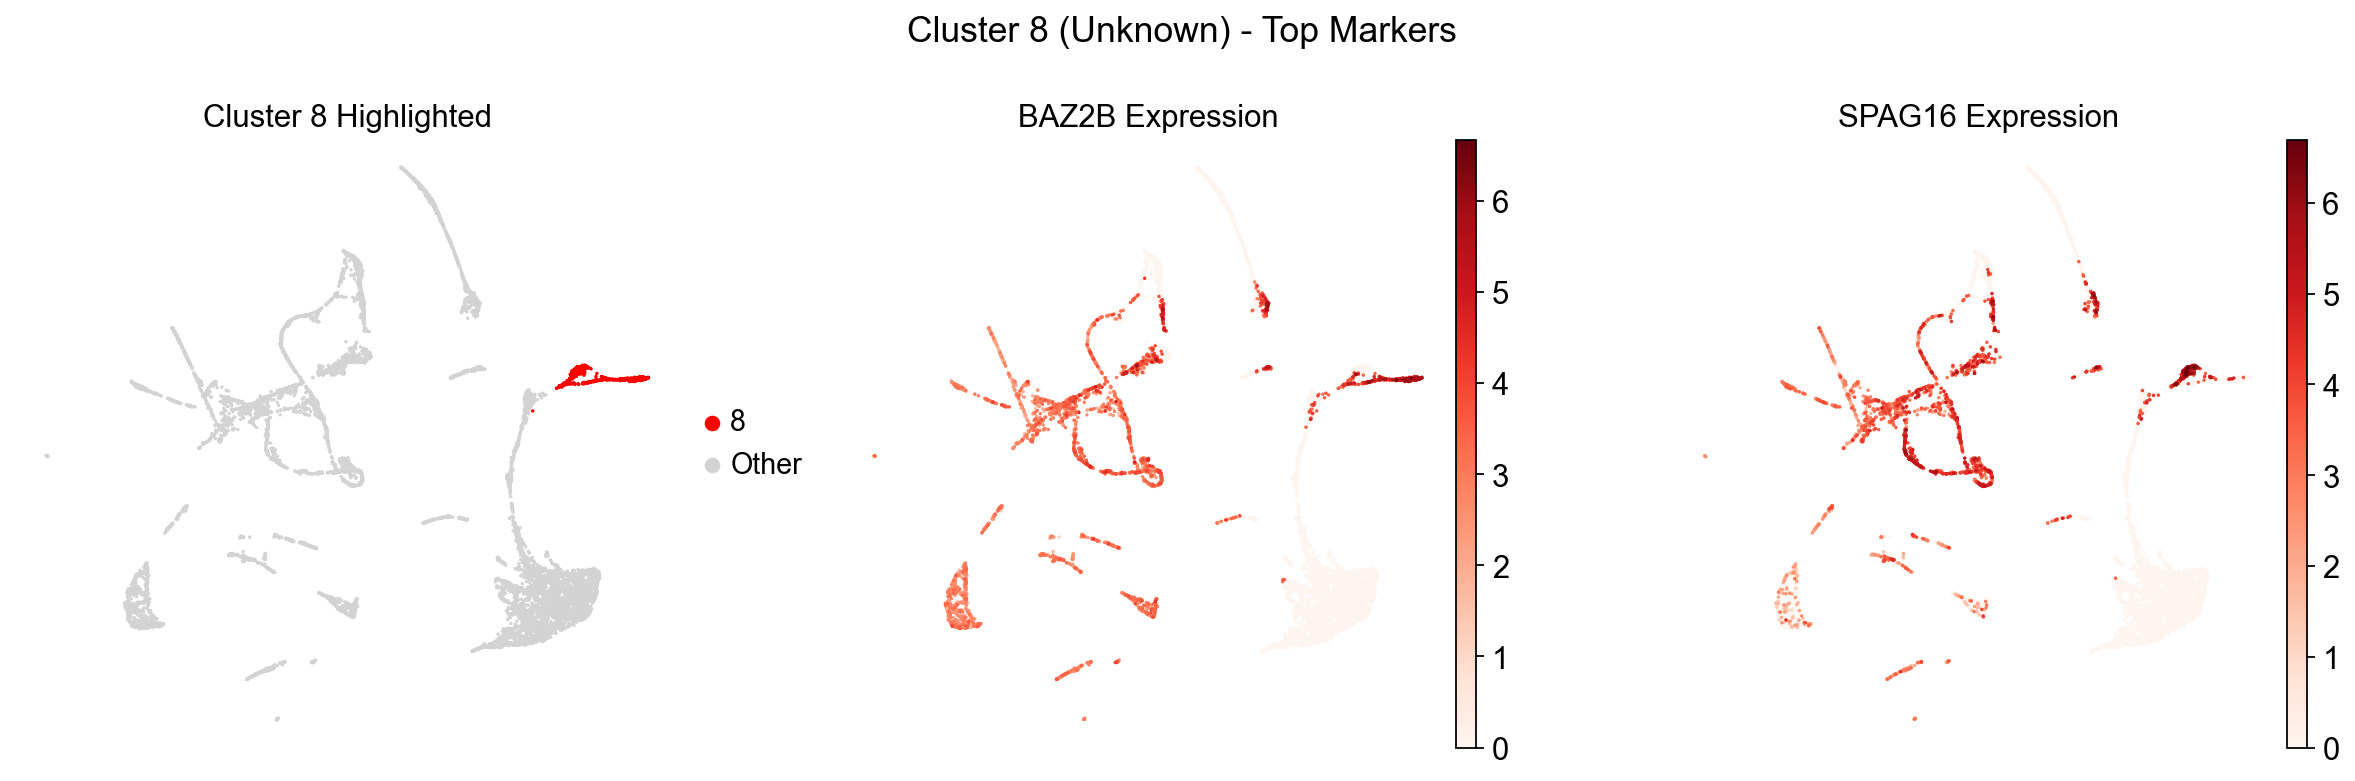

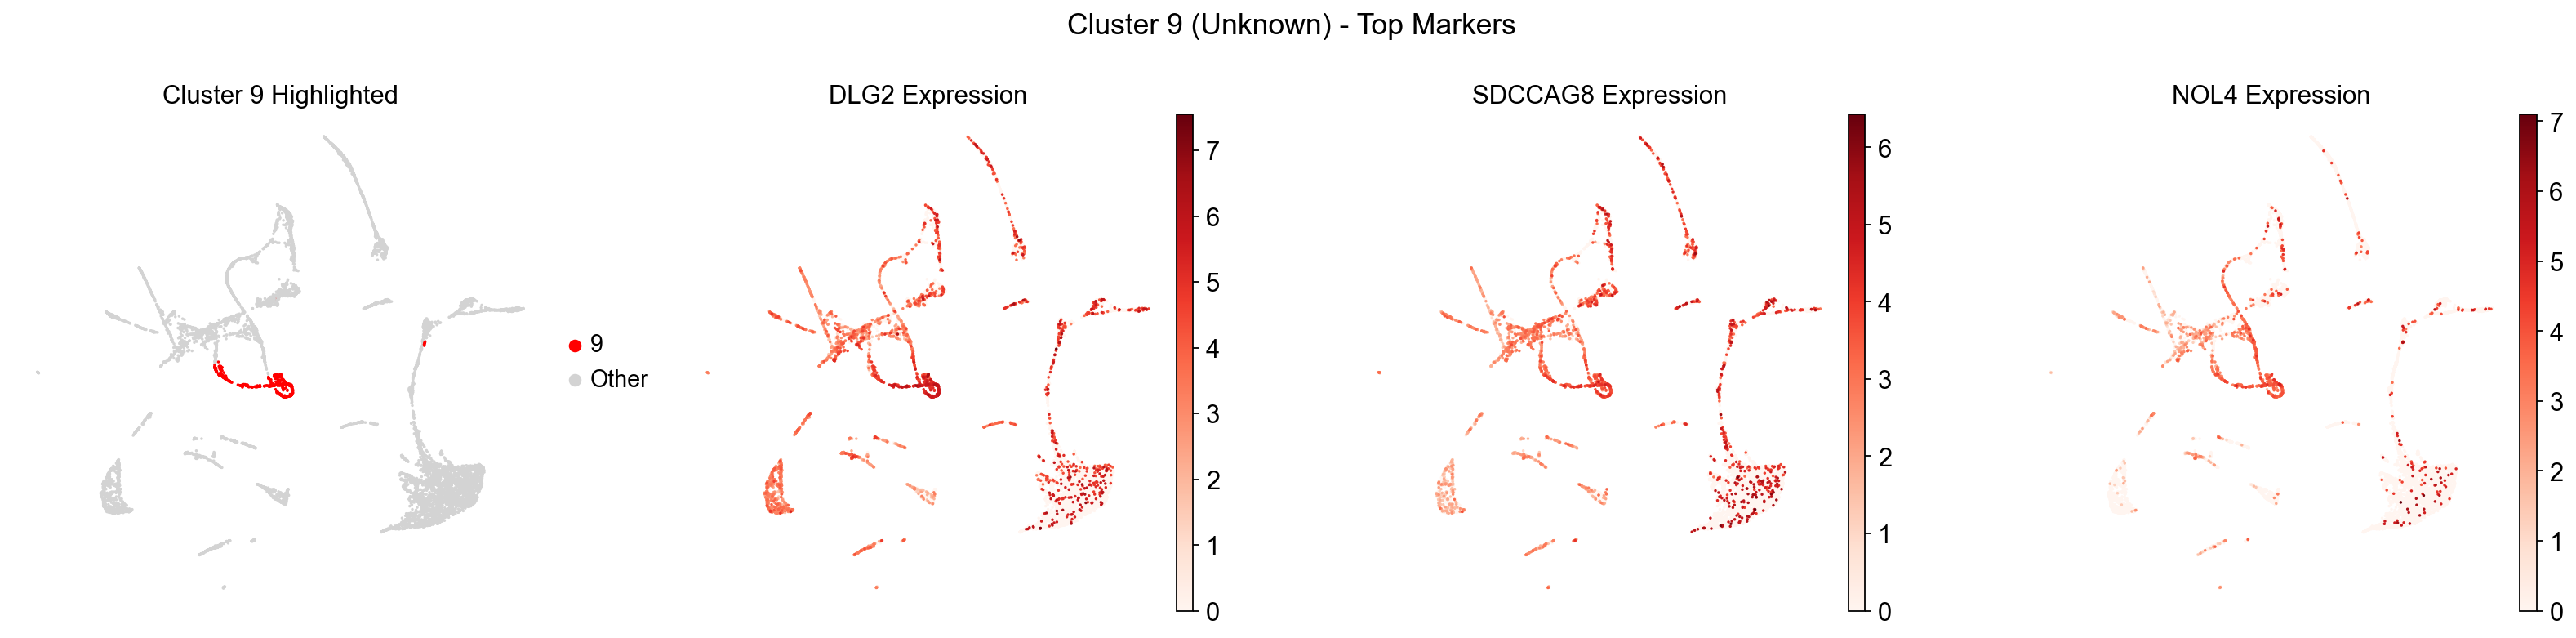

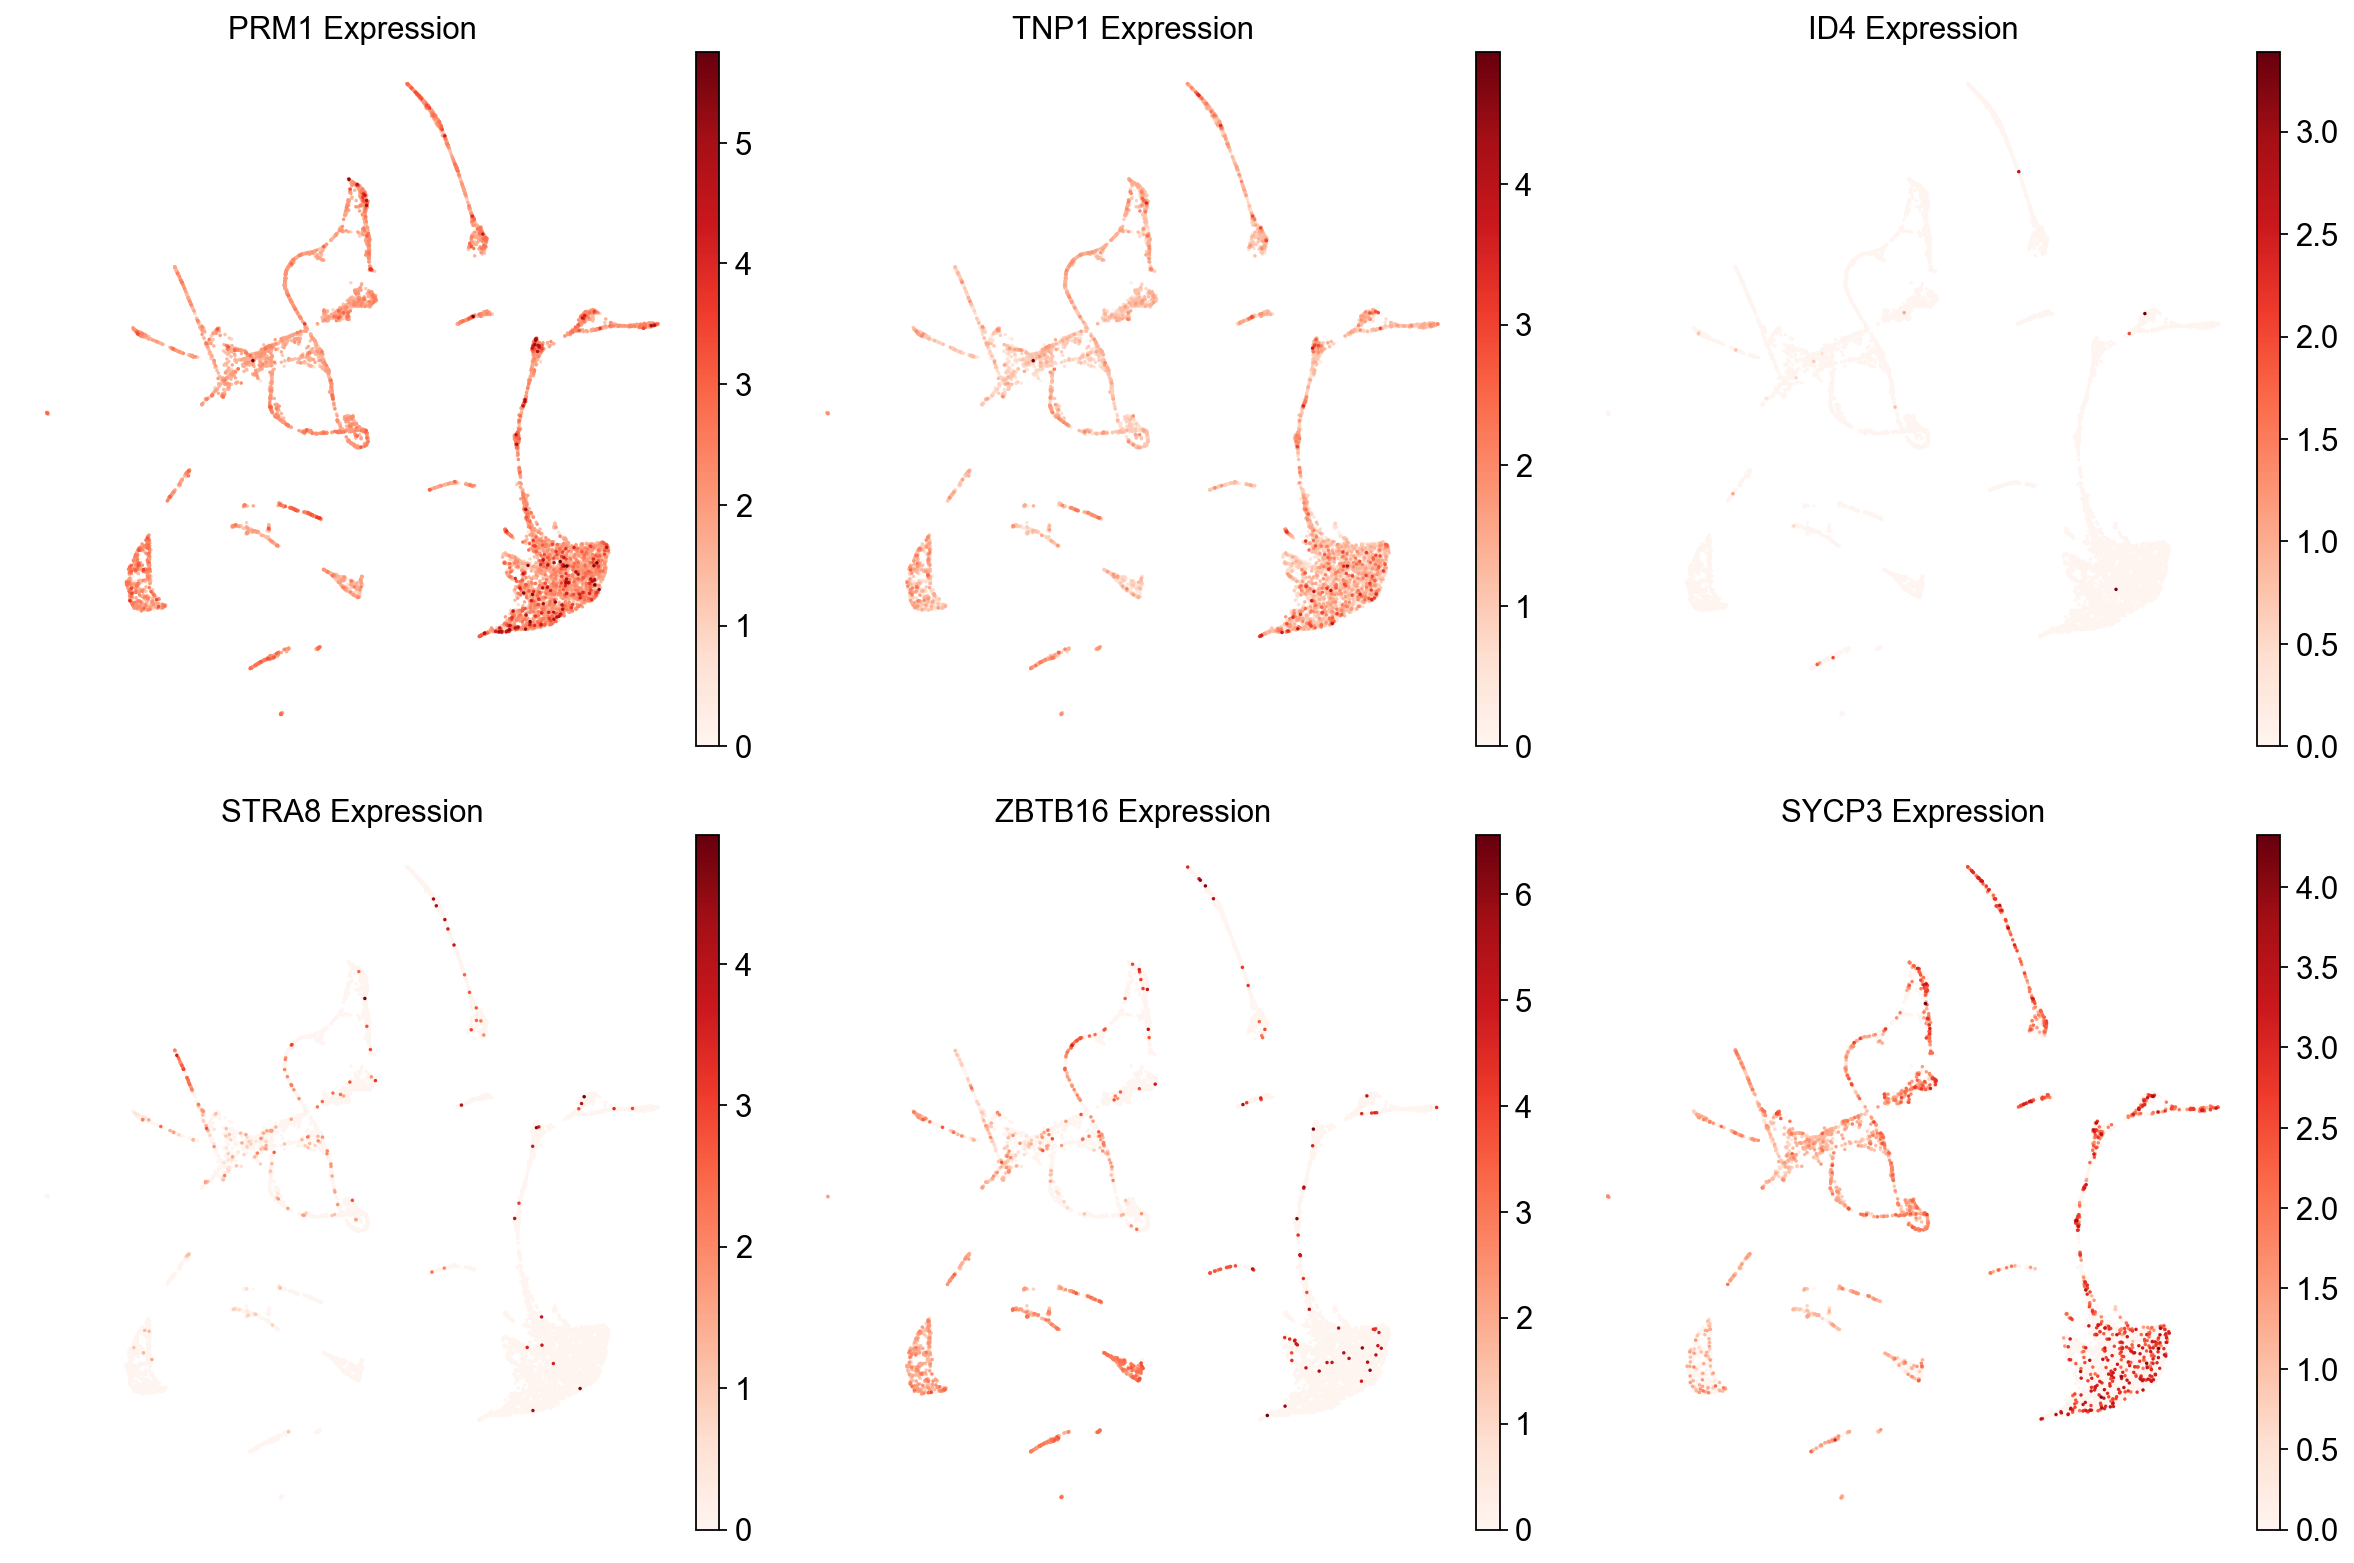

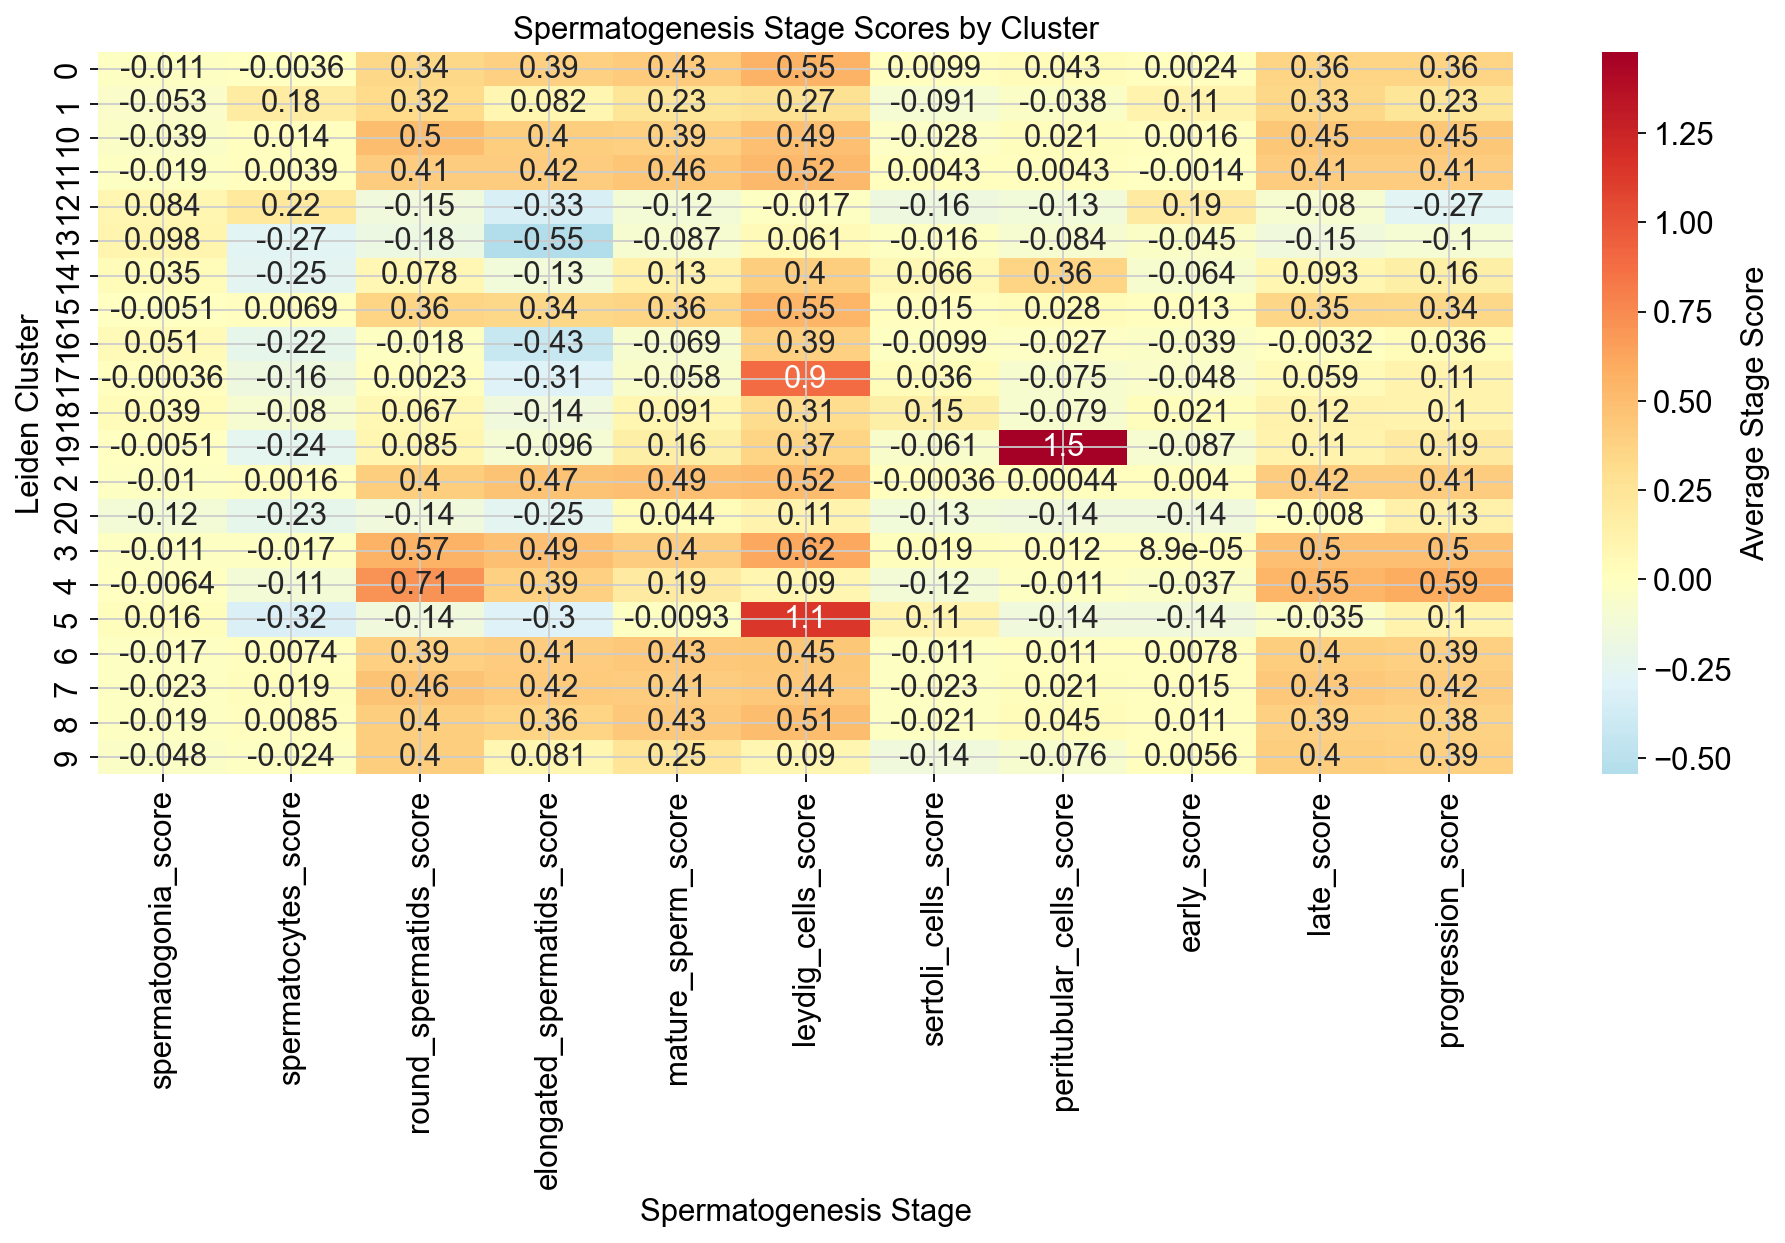

ValueError: supplied range of [0.0, inf] is not finite

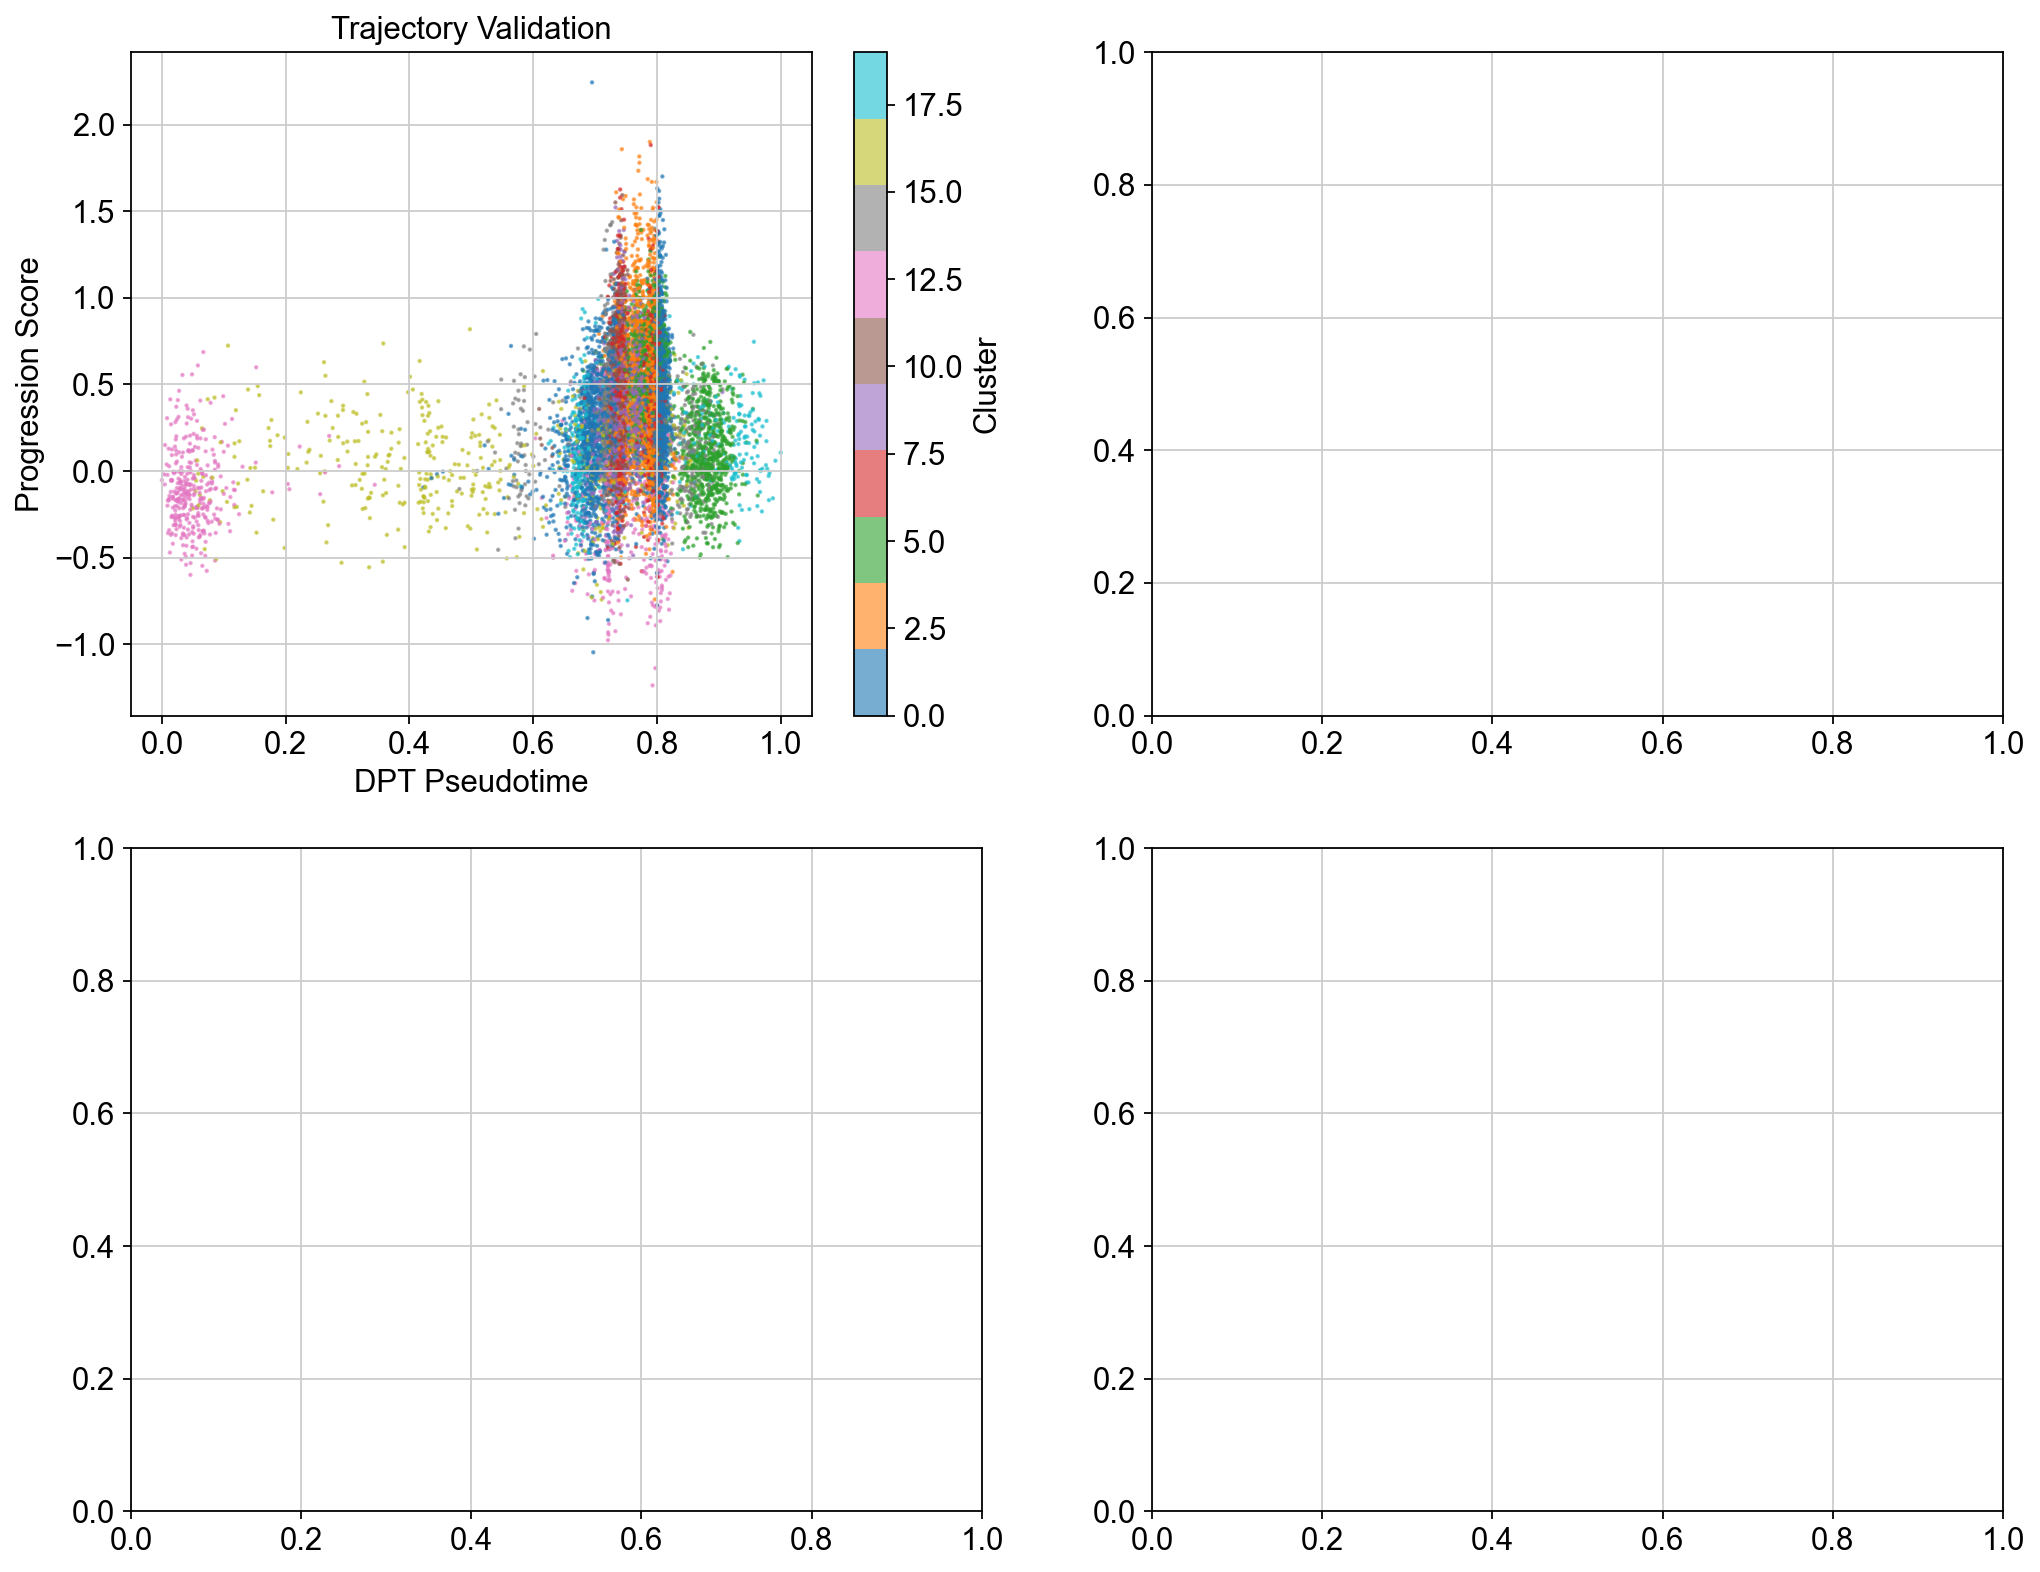

In [3]:

SA = SpermatogenesisAnalyzer(data_path='/Users/oskarhaupt/Documents/DE/2024_FU-Bachelor/WS-24-25/Charité/05_sorted/11_decontX/53_results_clusters/decontx_clusters_trimmed_gex.h5ad',
                             output_dir='55_GSEA_decontX_clusters')
cdata = SA.run_complete_analysis()

In [4]:
import scanpy as sc
import matplotlib.pyplot as plt

adata = sc.read_h5ad("00_data/foreground.h5ad")
adata

AnnData object with n_obs × n_vars = 12315 × 22040
    obs: 'emptydrops_detected', 'fdr_threshold', 'total_umi'
    var: 'gene_ids', 'feature_types', 'genome', 'interval'
    uns: 'filtering_info'

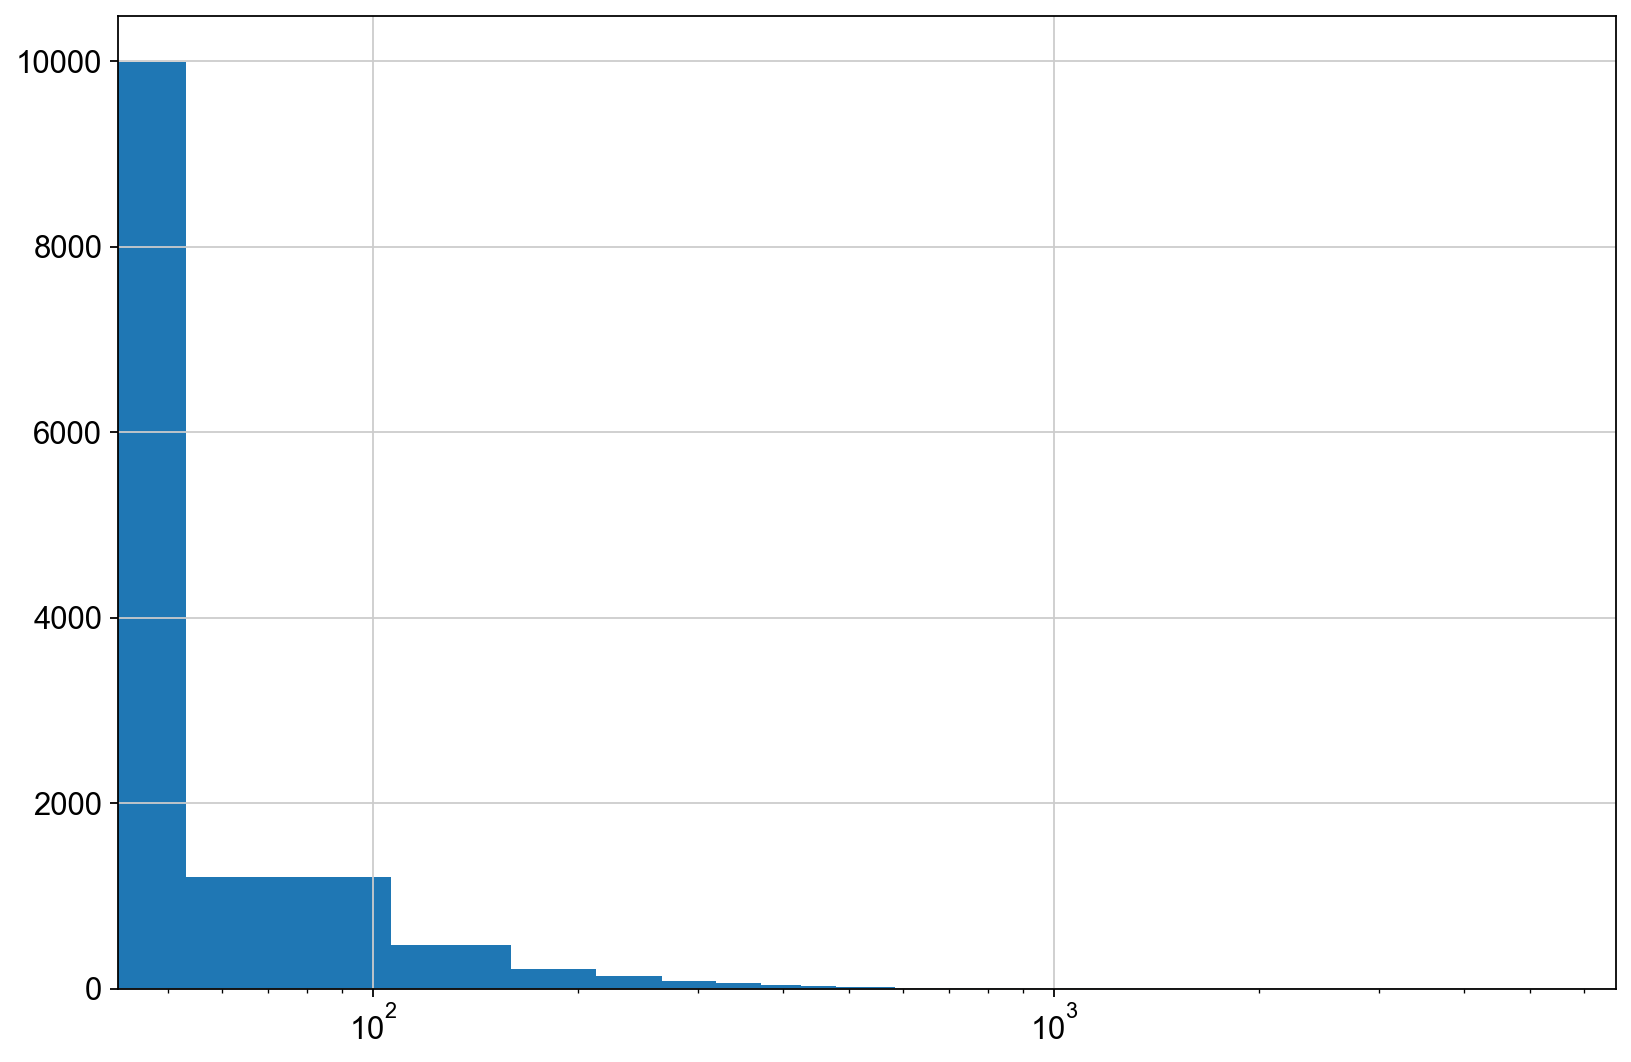

In [8]:
plt.hist(adata.X[:,adata.var_names=="PRM1"].todense(), bins=100)
plt.xscale("log")
plt.show()

(0.0, 40.0)

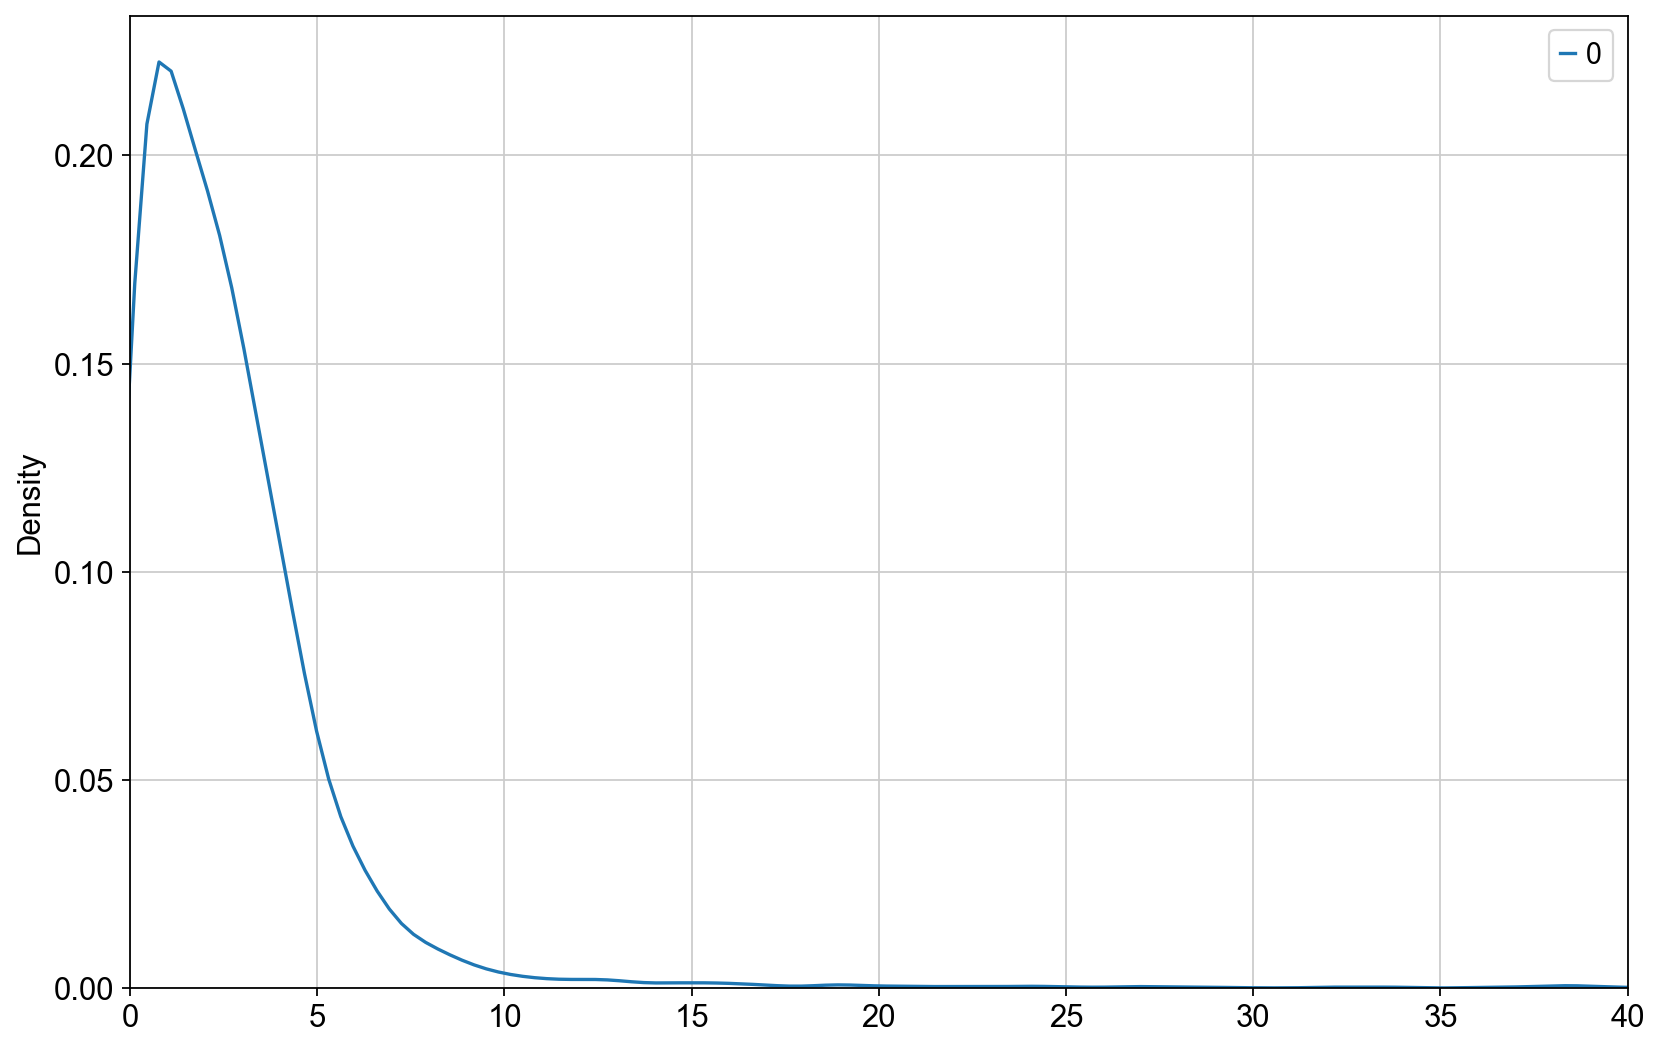

In [21]:
import seaborn as sns
sns.kdeplot(adata.X[:,adata.var_names=="PRM1"].todense() / adata.X.sum(axis=1)*100)
plt.xlim(0,40)

In [17]:
adata.X[0:10,adata.var_names=="PRM1"].todense()

matrix([[294.],
        [ 12.],
        [  3.],
        [  5.],
        [ 58.],
        [ 22.],
        [ 26.],
        [125.],
        [ 16.],
        [ 20.]], dtype=float32)

In [13]:
adata.X.sum(axis=1)

matrix([[11029.],
        [  256.],
        [ 1100.],
        ...,
        [  163.],
        [  272.],
        [  313.]], dtype=float32)